# ContactMatcher Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for ContactMatcher in 2023 is 133879.7315 dollars. It is operating at a loss, with total net profit at -403.5996 dollars. Total monthly profit margin is -0.30 %.
>* From January to June, revenue growth had been negative. Growth starts to pick up in July, and by December the CMGR is around 2.6% growth. Average CMGR is around -6%.
>* On average, ContactMatcher have around 72 users each month, with 33 being active. There is a 63.55% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* January cohort yields the highest number of active users. Starting at 26 users and retaining at 20 (70 % retention rate) in December.
>* In terms of NDR, July cohort is significant in that after its initial purchase, a 700% increase can be observed in the following month, and dropping to rates around 400% after that.
>* On a per-customer basis, the July Cohort contributes the highest lifetime revenue in 2023, with each user paying around 2k on average.
>* Despite a demand for the product, in some cohorts negative profit values per user can be observed.
>
>Profitability
>* Pre-discounts, the month of August shows the highest profit at 7067.89. Second highest is September, at 6208.25. These two months suggest peak profitability for Contactmatcher. Furthermore, there is a significant increase in positive profits during this period compared to previous periods, which indicate seasonal factors and/or successful business strategies during these months. 
>* December has the highest negative profit value, indicating potential issues or increased costs towards the end of the year. There is a noticeable pattern where positive profits begin to decline while negative profits seem to increase (peaking in December).
>
>Discounting EDA
>* There are 606 orders for Contactmatcher in 2023, 477 of which were applied discounts (~79%). Significant proportion of discounted orders could be indicative of a highly competitive market where similar products are available. Offering discounts helps stay competitive but might also signal that Contactmatcher needs to differentiate itself in other ways beyond price.
>* August remains the most profitable month despite significant discounts, with a net profit of 4620.99, followed by September at 4310.12.
>* In Q4 (October, November, and December), there is a significant negative trend with discounts amplifying losses. December experienced the highest negative profit at -5565.43, highlighting the adverse impact of excessive discounts aimed at boosting sales.
>* By range, discounts for Contactmatcher's orders are between 20-80%; a huge range. This suggests that ContactMatcher couldn't drive sales without resorting to excessive discounting, which is a negative indicator of strong demand and perceived value.
>* Both profitable (August and September) and negative months (October to December) have similar discount ranges, primarily in the lower (0-20%) and upper (70-80%) ranges, indicating that discount ranges alone do not account for profitability differences.
>* Positive profits are seen with 0-20% discounts, whereas higher discounts often lead to negative profits. 
>
>Ideal Customer Profile (ICP) EDA
>* SMBs are the top performers, driving 49.70% of net revenue and 48.64% of sales, with a net profit of 2,033.25, even higher at 16,521.68 before discounts. They are financially efficient and impactful. Despite SMBs' lead, the Strategic segment (30.32% net revenue, 30.86% sales) also contributes significantly. Even though the Strategic segment is losing profit (-42.70), abandoning it could mean lost opportunities. The Enterprise segment (19.98% net revenue, 20.50% sales) yields low contribution and low profits (-2,394.15) and should be given less consideration. A balanced strategy focusing on SMBs while improving the Strategic segment is the best approach.
>* In the SMB segment, Tech and Energy in AMER, and Manufacturing and Finance in EMEA perform best and need marketing focus. Finance in APJ, Communications in EMEA, Consumer Products in APJ, and Manufacturing in APJ lose money and are high-risk. Significant shares but minimal contribution from these industries suggest revising discount strategies. Balancing revenue and profitability requires smart measures and considering operational costs and marketing efforts.
>* In the Strategic segment, Consumer Products and Finance in AMER, and Communications in EMEA excel. However, Manufacturing, Healthcare, and Tech in APJ, and Tech in EMEA suffer severe losses. Despite Manufacturing's significant share, its contribution is minimal due to heavy discounting. Rethinking discount strategies is crucial for balancing revenue and profitability.
>*  In the Enterprise segment, focus on Tech and Healthcare in AMER, Finance in APJ, and Miscellaneous in EMEA for strategic growth. Address significant losses in Manufacturing and Retail in EMEA and APJ. Heavy discounting is the problem. Revise discount strategies to balance revenue and profitability effectively. Measure all costs to ensure overall profitability.
>* AMER consistently shows high performance in January, September, and October with strong sales and profits. It is the top-performing region with the highest sales, discounted sales, and net profit.
>* EMEA records the highest sales in October but also has significant net losses, highlighting the need for improved cost management. While it contributes substantial sales, reducing costs and improving profit margins is crucial.
>* APJ struggles with profitability, showing negative net profits in many months. Despite reasonable sales, issues with cost management or heavy discounting need to be addressed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
        'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod1 = df.query("Product == 'ContactMatcher'")
# then slice product df by year of analysis
prod1_2023=prod1.query('year == 2023')

----

### General Performance Report

In [7]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod1_2023['reg_date'] = prod1_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_13960\2064087696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod1_2023['reg_date'] = prod1_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [8]:
# make a user df, from the product df
prod1_2023_user = prod1_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [9]:
# from user df, extract month datetime data, from date of first purchase
prod1_2023_user['reg_month']= prod1_2023_user['reg_date'].values.astype('datetime64[M]')

In [10]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod1_2023_user['key'] = 1
prod1_2023_user = template_table.merge(prod1_2023_user,on='key')
prod1_2023_user =prod1_2023_user.drop('key',axis=1)

In [11]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod1_2023_user = prod1_2023_user[prod1_2023_user['Month']>=prod1_2023_user['reg_month']]

In [12]:
# Yet make ANOTHER df, make it 2 (from the product df), to be merged with the user df
# in prep we add another feature to the product df, a month column which contains the month of the order date
# this month column is different than the reg_date column applied to product df from previous, as it doesnt sort to min
prod1_2023['Month'] = prod1_2023['Order Date'].values.astype('datetime64[M]')
# make sales df
sales_month = prod1_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
# make accounts, or invoices df
account = prod1_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
# these 2 make bebeh with user df
prod1_2023_user = prod1_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod1_2023_user = prod1_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_13960\653251036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod1_2023['Month'] = prod1_2023['Order Date'].values.astype('datetime64[M]')


In [13]:
#add some funky features for the user df, the purpose all along. 
#to see user activity with a more robust (complicated but easily understandable) dataframe...once aggregated.
prod1_2023_user['user'] = 1    
prod1_2023_user['new user'] = (prod1_2023_user['reg_month'] == prod1_2023_user['Month']) * 1 
prod1_2023_user['active'] = (prod1_2023_user['Sales'] > 0) * 1   
prod1_2023_user['active_prev'] = (prod1_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod1_2023_user['change_status'] = (prod1_2023_user['active'] != prod1_2023_user['active_prev']) * 1
prod1_2023_user['session_id'] = (prod1_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod1_2023_user['inactive'] = (prod1_2023_user['active'] == 0) * 1
prod1_2023_user['month_inactive'] = (prod1_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [14]:
# YEH.
#ContactMatcher monthly user report (2023)
prod1_2023_report = prod1_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod1_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,163.0000,28.0000,12121.4040,10252.1656,3721.8184,1852.5800,26,26,26
2023-02-01,55.0000,12.0000,1940.7220,891.9932,-341.7688,-1390.4976,32,6,11
2023-03-01,175.0000,34.0000,5160.3040,4184.8828,1365.0779,389.6567,50,18,29
2023-04-01,159.0000,30.0000,7256.9175,6033.5527,2671.8806,1448.5158,62,12,24
2023-05-01,175.0000,39.0000,5365.2280,4162.8633,1396.8955,194.5308,71,9,29
2023-06-01,147.0000,35.0000,5055.0410,3975.7459,1168.7560,89.4609,80,9,30
2023-07-01,128.0000,32.0000,5474.7690,4043.4477,948.7295,-482.5918,85,5,28
2023-08-01,198.0000,35.0000,17882.7700,13867.2740,6916.1347,2900.6387,87,2,30
2023-09-01,277.0000,61.0000,17650.2380,13683.7388,5307.1615,1340.6623,93,6,44


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [ ]:
import pickle
# Save the DataFrame to a pickle file
with open('prod1_2023_report.pkl', 'wb') as file:
    pickle.dump(prod1_2023_report, file)

In [16]:
prod1_2023_churn = prod1_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod1_2023_churn['old active'] = (prod1_2023_churn['active'] - prod1_2023_churn['new user'])
prod1_2023_churn['user churn'] = ((1 - (prod1_2023_churn['old active'] / prod1_2023_churn['user'].shift(1))) * 100).round()
prod1_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,12121.4040,1852.5800,26,26,26,0,NaN
2023-02-01,1940.7220,-1390.4976,32,6,11,5,81.0000
2023-03-01,5160.3040,389.6567,50,18,29,11,66.0000
2023-04-01,7256.9175,1448.5158,62,12,24,12,76.0000
2023-05-01,5365.2280,194.5308,71,9,29,20,68.0000
2023-06-01,5055.0410,89.4609,80,9,30,21,70.0000
2023-07-01,5474.7690,-482.5918,85,5,28,23,71.0000
2023-08-01,17882.7700,2900.6387,87,2,30,28,67.0000
2023-09-01,17650.2380,1340.6623,93,6,44,38,56.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [17]:
#monthly avg. user churn
prod1_2023_churn[["user", "active", "user churn"]].mean()

user         72.6667
active       33.5000
user churn   63.5455
dtype: float64

In [18]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report=pd.DataFrame(prod1_2023.groupby(['month'])[['Sales', 'net_profit']].sum()).reset_index()

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 12121.4040, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month difference'], axis=1)

sales_report

,month,Sales,net_profit,CMGR
0,1,12121.4040,1852.5800,0.0000
1,2,1940.7220,-1390.4976,-83.9893
2,3,5160.3040,389.6567,-34.7529
3,4,7256.9175,1448.5158,-15.7183
4,5,5365.2280,194.5308,-18.4341
5,6,5055.0410,89.4609,-16.0474
6,7,5474.7690,-482.5918,-12.4071
7,8,17882.7700,2900.6387,5.7124
8,9,17650.2380,1340.6623,4.8093
9,10,21561.7400,-1130.4060,6.6086


In [17]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

-2.128056590241458

In [18]:
#The CMGR is skewed (negative), median is closest I can get to an average
sales_report['CMGR'].median()

-6.2035593661015405

In [311]:
prod1_2023[['Sales', 'net_profit']].sum()

Sales        133879.7315
net_profit     -403.5996
dtype: float64

In [315]:
# Total monthly profit margin
(-403.5996/ 133879.7315) * 100


-0.3014643034296794

In [19]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,-0.0500
net_profit,-0.0500,1.0000


**Key findings:**
1. On average, ContactMatcher have around 72 users each month, with 33 being active. There is a 63.55% likelihood of users churning in the next month. Number of accounts and quantity of purchases tend to increase by the end of the year (81 accounts and 369 units purchased in December), but number of new users decrease (only 2 new user in December).
2. From January to June, revenue growth had been negative. Growth starts to pick up in July, and by December the CMGR is around 2.6% growth. On average, CMGR is around -6%.
3. Total revenue for ContactMatcher in 2023 is 133879.7315 dollars. It is operating at a loss, with total net profit at -403.5996 dollars. This put Contactmatcher's profit margin at -0.30 %.
4. Increase in monthly revenue does not equal an increase in monthly profit. In October where revenue is highest in 2023 (21561.7400) there is a loss of profit at -1130.4060.

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod1_2023_user['date']=prod1_2023_user['Month'].dt.to_period('M')
prod1_2023_user['cohort']= prod1_2023_user['reg_month'].dt.to_period('M')
prod1_2023_user['lifetime'] = (prod1_2023_user['date'] - prod1_2023_user['cohort']).apply(attrgetter('n'))

In [224]:
prod1_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,user churn
0,2023-01-01,1002,Aetna,2023-01-16,2023-01-01,5.0000,37.0600,7.4120,-29.4342,-59.0822,1.0000,1,1,1,NaN,1,1,0,0,0
1,2023-01-01,1004,Amazon,2023-01-08,2023-01-01,3.0000,2.8080,0.8424,-0.0000,-1.9656,1.0000,1,1,1,NaN,1,1,0,0,0


In [17]:
prod1_cohort = prod1_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod1_cohort ['active rate'] = (prod1_cohort['active'] / prod1_cohort['user']) * 100
prod1_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,26,26,26,100.0000
1,2023-01-01,1,26,0,5,19.2308
2,2023-01-01,2,26,0,11,42.3077
3,2023-01-01,3,26,0,5,19.2308
4,2023-01-01,4,26,0,9,34.6154
...,...,...,...,...,...,...
73,2023-10-01,1,1,0,1,100.0000
74,2023-10-01,2,1,0,1,100.0000
75,2023-11-01,0,1,1,1,100.0000
76,2023-11-01,1,1,0,1,100.0000


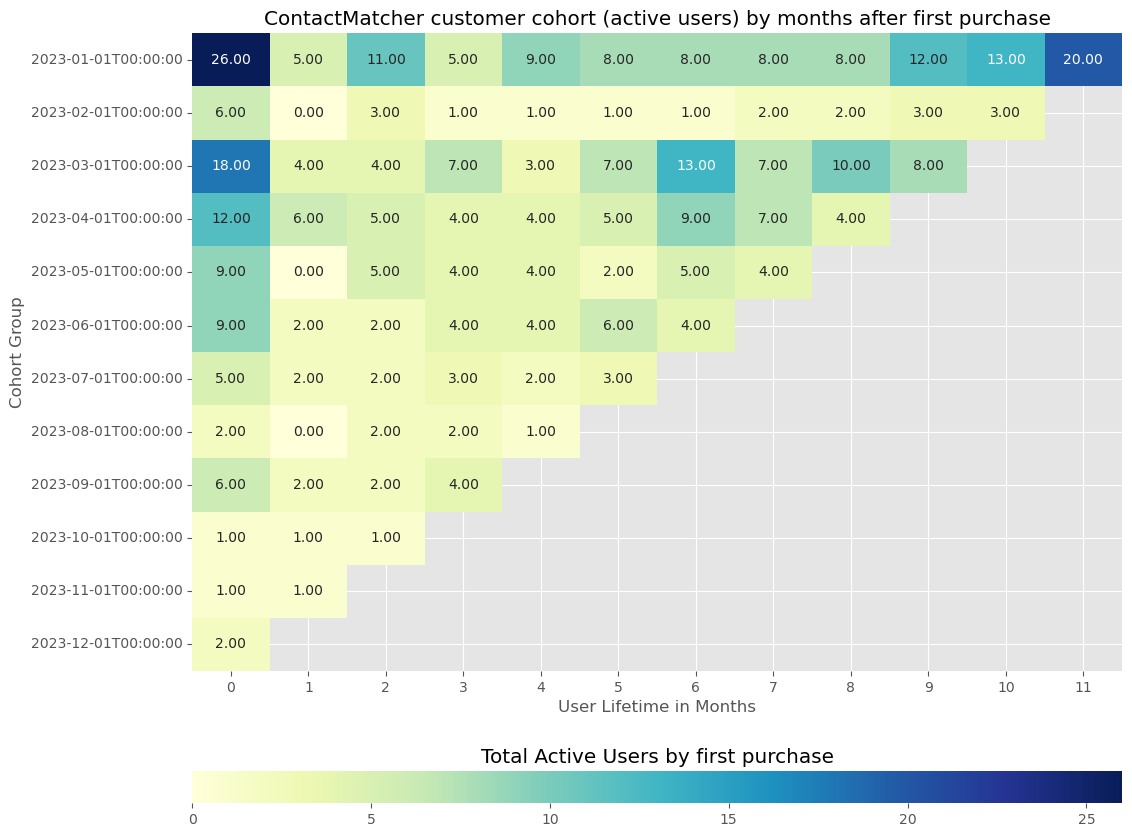

In [19]:
# customer cohort
pivot0 =prod1_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ContactMatcher customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- January cohort (1st cohort) has the highest number of active users, compared to other cohorts. Starting at 26 users and retaining at 20 in December. 
- In the 3rd and 4th cohorts, there is a spike in active users around July.

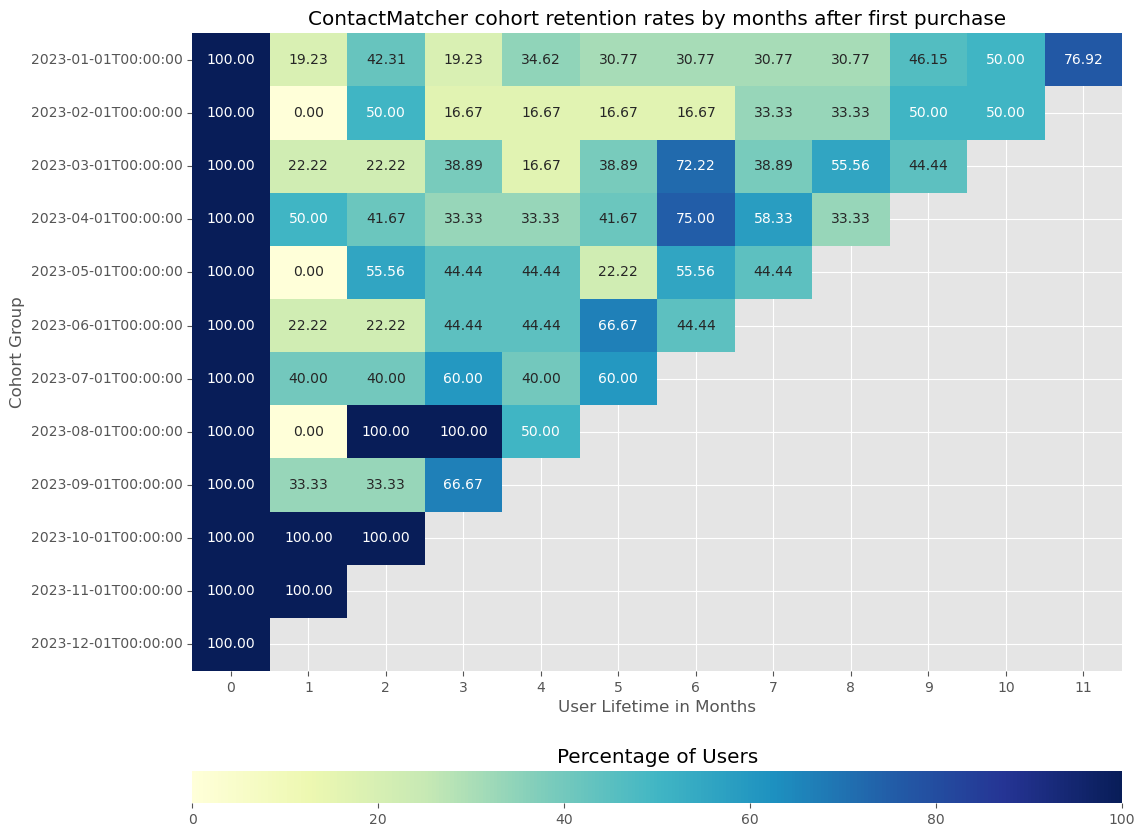

In [20]:
# customer retention
pivot1 =prod1_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ContactMatcher cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- Retention rate seems high for the 10th, 11th, and 12th cohorts, but from the previous table we know that there is only 1-2 active user in these cohorts.
- Generally, retention rate start increasing at the end of year for all cohorts. With exception from the 3rd and 4th cohort, whose retention drops down after a significant increase in July.
- Retention for the January cohort (who has more users than the other cohorts), drops significantly after the first month and throughout the year, at around 30%. Numbers starts to increase after September, peaking at around 70% in December.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

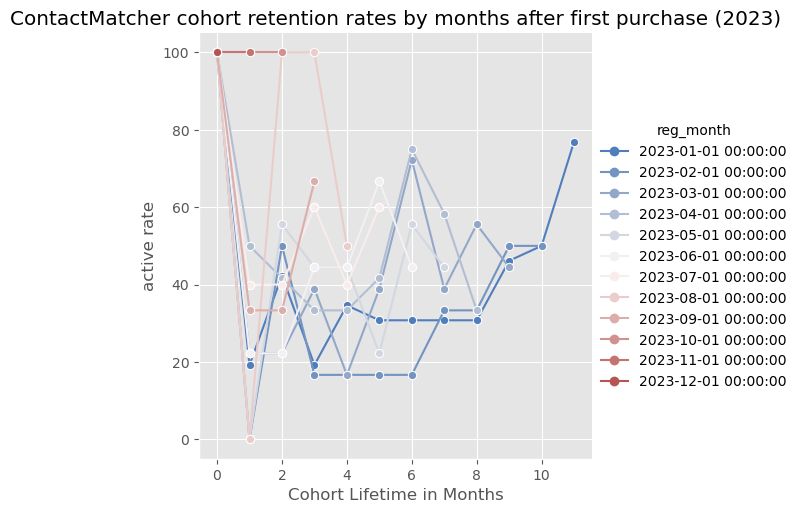

In [21]:
# retention rate lineplots
sns.relplot(data=prod1_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('ContactMatcher cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [16]:
prod1_cohort2 =prod1_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

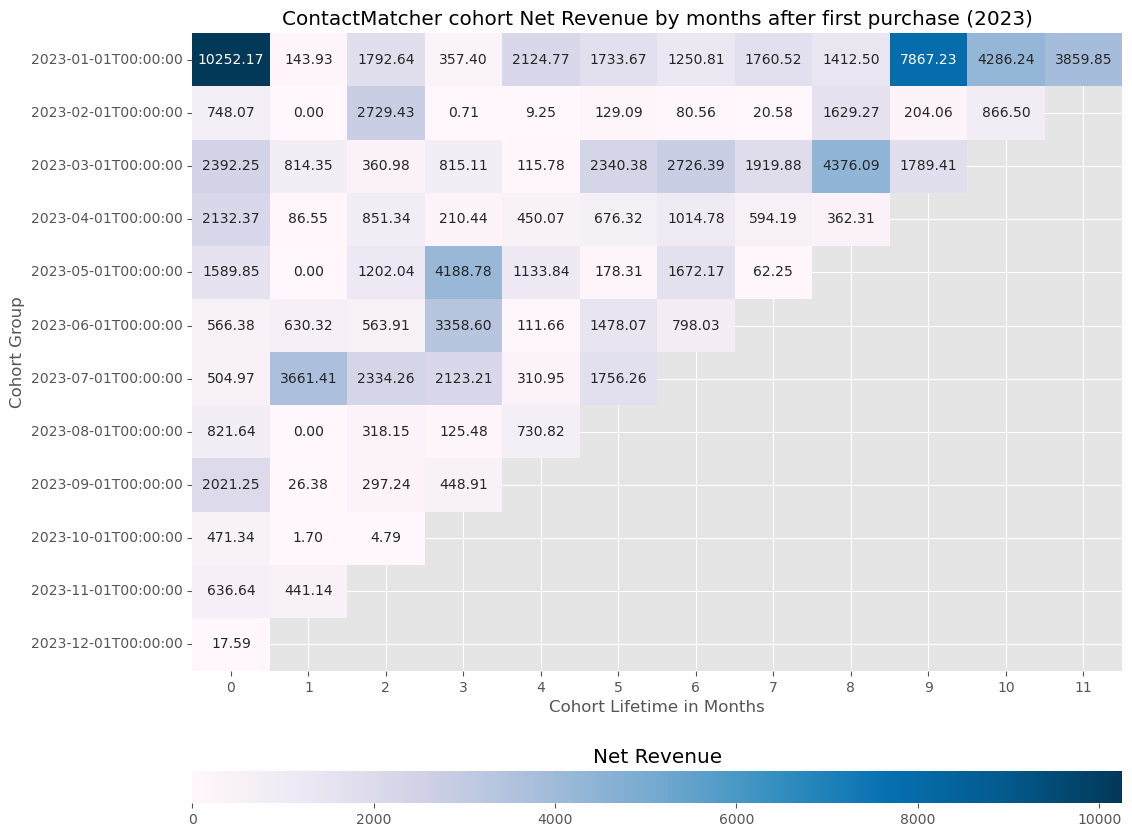

In [23]:
# Net Revenue by Cohort
pivot2 =prod1_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ContactMatcher cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- January cohort has a real high amount of initial purchase (10k), with lower but significant subsequent purchases over time (~1k-2k). In October, there is a notable purchase of around 7k.
- March cohort has a stream of notable purchases starting from August (~2k), with November being notable (4k)
- July cohort initially has an average amount of purchase (~500), but increasing significantly subsequently, at 
~3.5k for the second month, and ~2k the rest of the year.

In [17]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod1_2023_user.loc[prod1_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod1_cohort2 = prod1_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod1_cohort2 ['net dollar retention'] = (prod1_cohort2['discounted_sales'] / prod1_cohort2['ds_max']) * 100

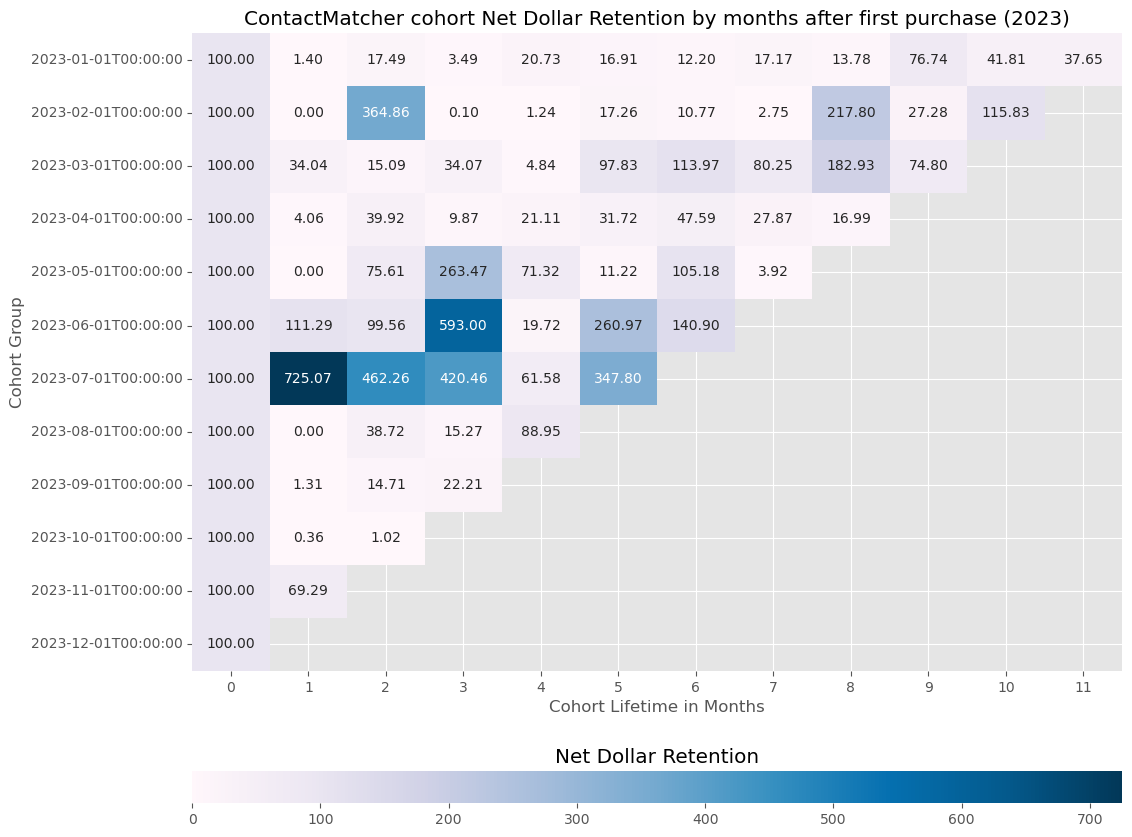

In [25]:
# Net Dollar/Revenue Retention
pivot3 =prod1_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ContactMatcher cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.


- for ContactMatcher, generally NDR rates are below 100%, with some rates below 1% in months for certain cohorts. Yet there are months where rates exceed 100% after initial purchase.
- July cohort is significant in that after initial purchase, a 700% increase can be observed in the following month, and dropping to rates around 400% after that. It is a sign that this is a cohort that has recently discovered value in the product, and with whom engagement should be increased for insights. (is it due to expansion revenue, for example?)
- June cohort is also significant in terms of NDR, as their lifetime purchases often exceeds 100%, and in September their NDR is at ~600%.
- January cohort, despite having the most users, generally high retention (loyal), and relatively high revenue value, possess low NDR rates. It is a sign that these are users that has found a limit in the value of the product, and their engagement with the product may be at stake in the future (they still use the product, but not willing to spend much money on it). Engagement should be increased for insights, to find out the reasons for revenue churn.

In [18]:
prod1_cohort2 ['cumulative lifetime revenue'] = prod1_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

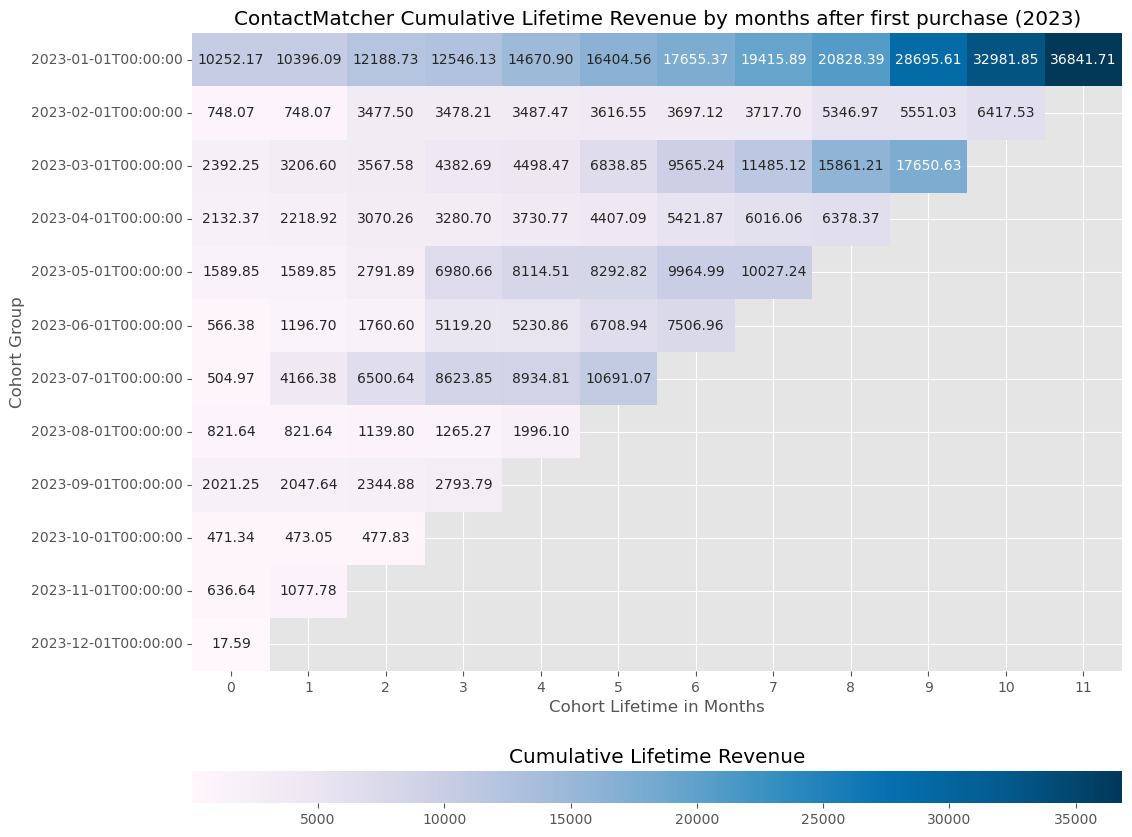

In [27]:
# cumulative lifetime revenue by cohort
pivot4 =prod1_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ContactMatcher Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()


Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

- January cohort yield the most revenue out of all cohorts, as by the end of the month they have generated ~36k in revenue. Their initial purchase was also high, at ~10k. High revenue can also be observed in the March, May, and July cohorts (each contributing over 10k by the end of month and with significant cumulative value each month).
- Some cohorts, such as the February cohort, have a big purchase at one month, but is cumulatively stagnant until the end of year (where purchases are increased). While others, such as the September cohort, only have high purchases during their initial month, and become stagnant during in the following months.

In [19]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod1_2023_user.loc[prod1_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod1_cohort2 = prod1_cohort2.merge(user_max,how='left',on=['reg_month'])
prod1_cohort2 ['customer lifetime revenue'] = (prod1_cohort2['cumulative lifetime revenue'] / prod1_cohort2['user_max'])

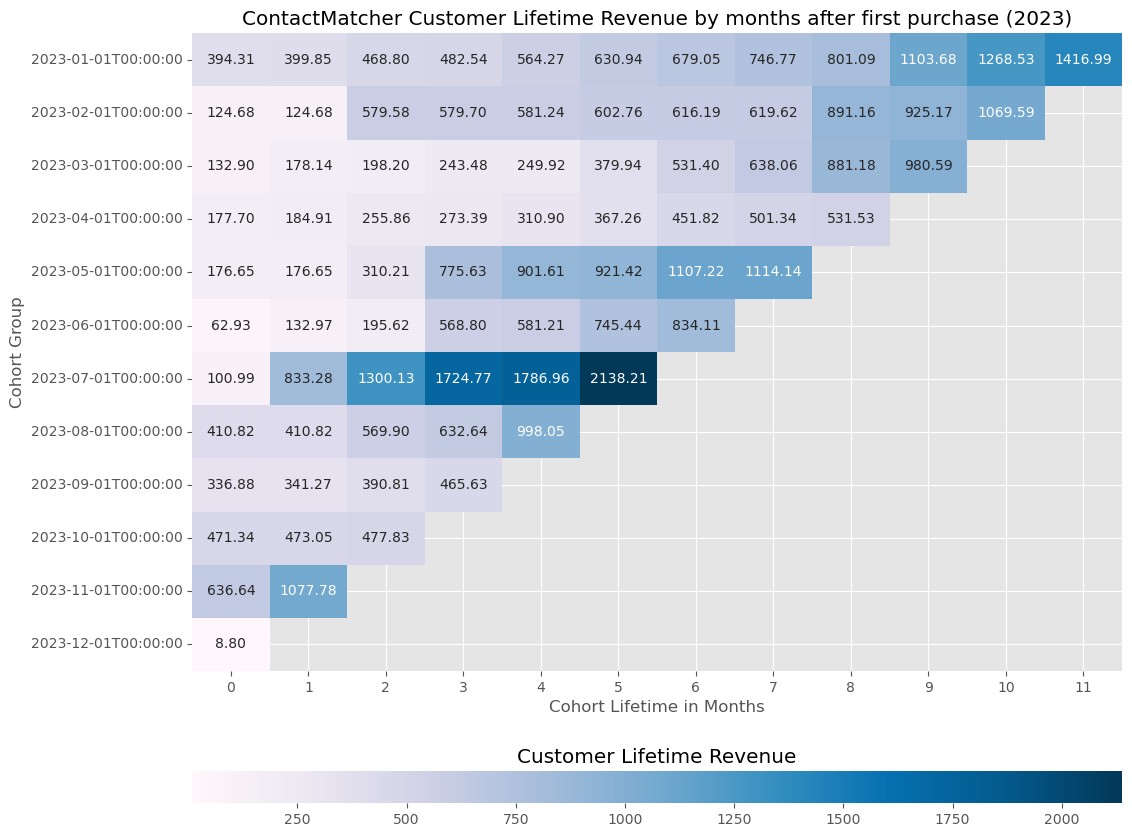

In [29]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod1_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ContactMatcher Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

- On a per customer basis, the highest can be observed in the July Cohort. By the end of the month, each user in the cohort on average would pay around 2k. These are probably new users, and there are only 5 in the initial month, but each user are willing to pay quite a huge sum for the product. 
- Second highest are the January cohort, within which each user by the end of the month would pay around 1.5k. These are the most loyal users, with 26 users in the initial month.
- It can be observed that there are huge spikes in per-user revenue by the end of the year, which indicate some kind of demand for the product.

In [20]:
# CLV - but with net profit
prod1_cohort2 ['cum_net_profit'] = prod1_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod1_cohort2 ['Customer Lifetime Value'] = (prod1_cohort2['cum_net_profit'] / prod1_cohort2['user_max'])

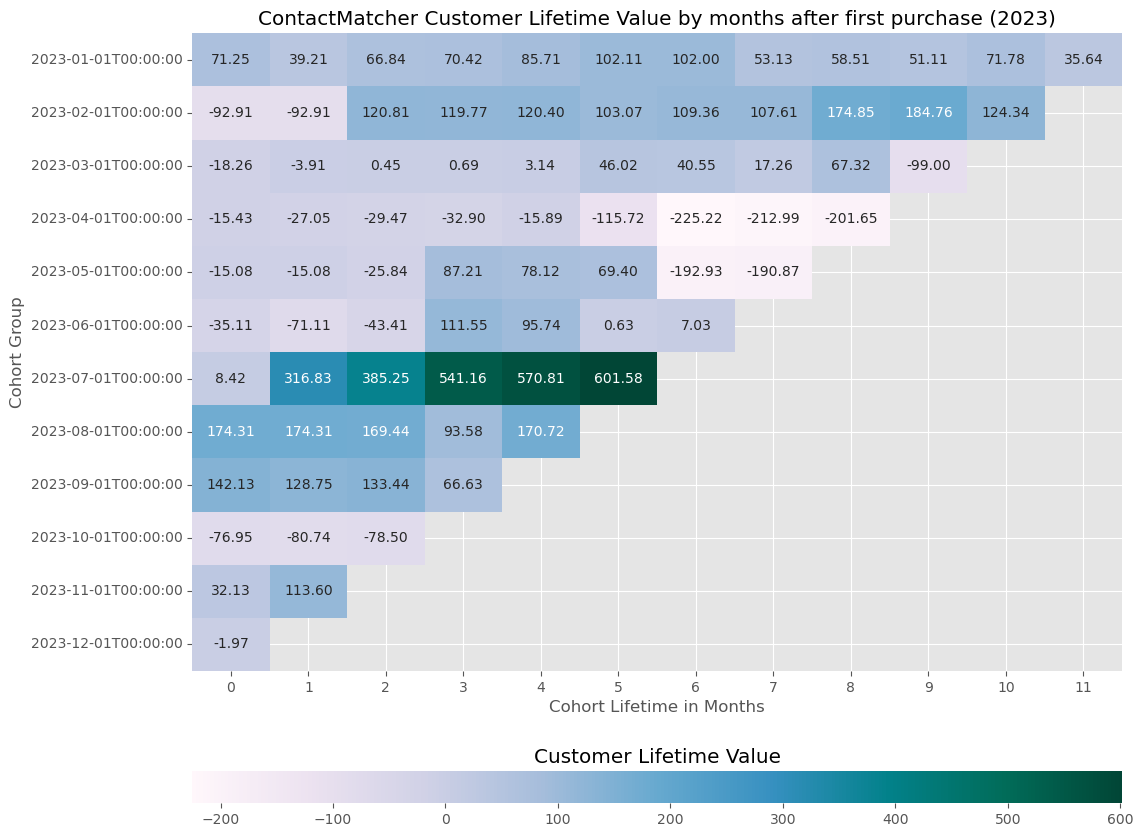

In [31]:
# Customer Lifetime Value, by cohort
pivot6 =prod1_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ContactMatcher Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

*Notes
- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

--------------

-  It can be observed that there are many negative profit values per user in the cohorts, meaning that ContactMatcher is probably contributing to loss. Especially in the March cohort, where negative profit values grow over time (~ -200 per user by the end of month). 
- July cohort provide the highest profits from all the cohorts per user (~600 at the end of month with ~300 made by the second month of initial purchase). Based on the CLV, this cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of July cohort should not be taken at face value. Just for estimation purposes.
- Though having more users than other cohorts and higher retention, the January cohort provide lower-than-expected profit per user. At only ~30 by the end of month. 

**Key findings:**
1. January cohort yields the highest number of active users. Starting at 26 users and retaining at 20 (70 % retention rate) in December. It also yield the highest revenue, at ~36k by December. Despite having the most users and revenue, however, January cohort possess low NDR rates, with no months reaching 100% after initial purchase.
2. Purchase of the July cohort initially was low (~500), but increased significantly afterwards. Around 3.5k for the second month, and ~2k the rest of the year. In terms of NDR, July cohort is significant in that after its initial purchase, a 700% increase can be observed in the following month, and dropping to rates around 400% after that. June cohort is also significant in terms of NDR, as their lifetime purchases often exceeds 100%, and in September their NDR is at ~600%.
3. On a per-customer basis, the July Cohort contributes the highest lifetime revenue in 2023, with each user paying around 2k on average.
4. Generally for all cohorts, there is spikes in revenue per-user revenue by the end of the year, which indicate an increased demand for ContactMatcher during this period.
5. Despite a demand for the product, in some cohorts negative profit values per user can be observed.

### Profitability

In [21]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod1_2023[prod1_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod1_2023[prod1_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

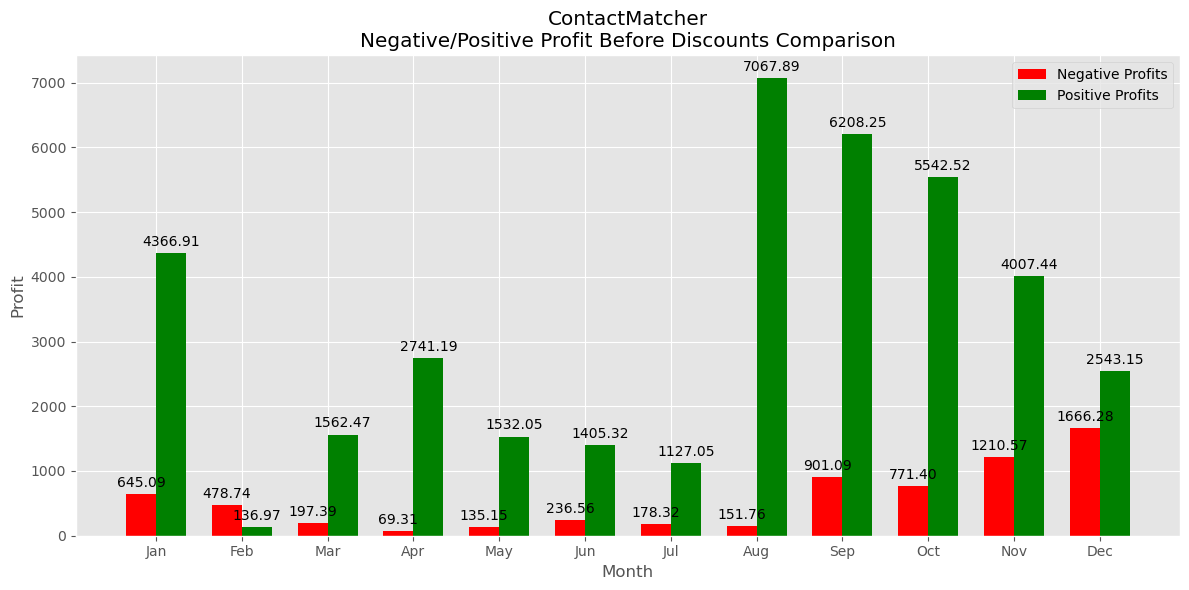

In [22]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('ContactMatcher\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

>"Before Discounts" reflects a theoretical scenario assuming sales were made without discounts. This represents a potential profit scenario assuming all sales happened at full price.

**Key findings:**
1. Pre-discounts, the month of August shows the highest profit at 7067.89. Second highest is September, at 6208.25. These two months suggest peak profitability for Contactmatcher. Furthermore, there is a significant increase in positive profits during this period compared to previous periods, which indicate seasonal factors and/or successful business strategies during these months. 
2. December has the highest negative profit value, indicating potential issues or increased costs towards the end of the year. There is a noticeable pattern where positive profits begin to decline while negative profits seem to increase (peaking in December).

### Discounting EDA

In [23]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod1_2023[(prod1_2023['net_profit'] < 0)]
post_discount_positives = prod1_2023[(prod1_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

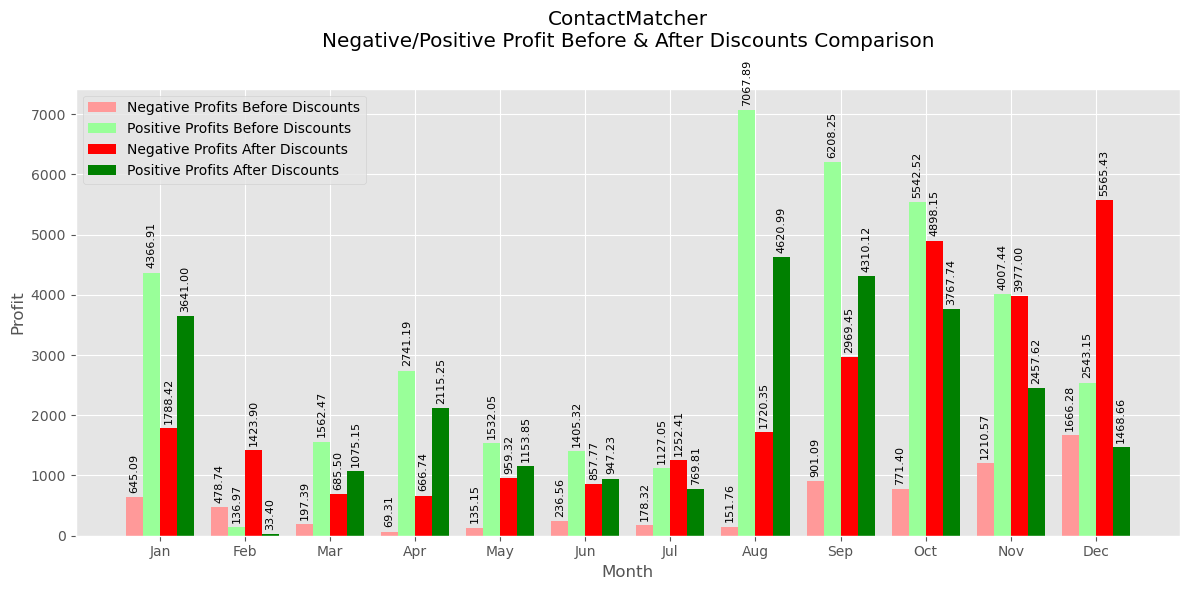

In [24]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('ContactMatcher\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

>"After Discounts" reflect Actual profit accounting for discounts, showing real-world profit outcomes.

- After discounts, profit in August is severely reduced. However, it remains the most profitable month with profits at 4620.99. This suggest that the period is particularly strong for sales (peak period). Same can be said for September, whose profit is second to August at 4310.12.
- In Q4, October, November, and December show a significant negative trend where discounts have turned profits negative. Before discounts, positive profits declined from 5542.52 in October to 4007.44 in November, and 2543.15 in December. After discounts, December had the highest negative profit at 5565.43, indicating that excessive discounts aimed at boosting declining sales backfired.

C:\Users\arizk\AppData\Local\Temp\ipykernel_12028\1881830506.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month_name'] = filtered_df['month'].map(month_names)
C:\Users\arizk\AppData\Local\Temp\ipykernel_12028\1881830506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['month'].astype(int)


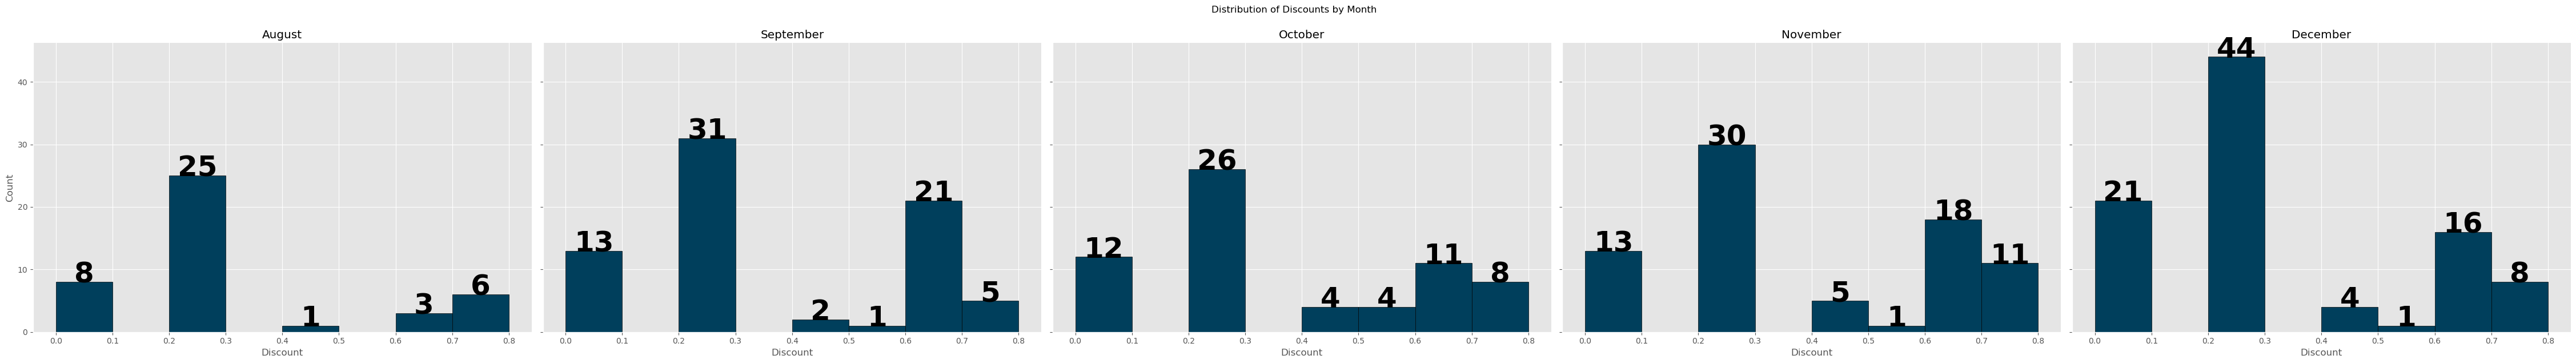

In [ ]:
# Range of Discounts (August, September, October, November, December)
filtered_df = prod1_2023[prod1_2023['month'].isin([8, 9, 10, 11, 12])]

# Mapping month numbers to month names
month_names = {8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
filtered_df['month_name'] = filtered_df['month'].map(month_names)

# Sort the DataFrame by month
filtered_df['month'] = filtered_df['month'].astype(int)
filtered_df = filtered_df.sort_values('month')

# Create the FacetGrid and set the titles
g = sns.FacetGrid(filtered_df, col="month_name", col_wrap=5, height=6, aspect=1.5, col_order=['August', 'September', 'October', 'November', 'December'])

# Function to plot histogram and annotate bars with black outlines
def plot_and_annotate_histogram(x, **kwargs):
    ax = plt.gca()
    n, bins, patches = ax.hist(x, bins=8, color='#003f5c', edgecolor='black')
    for p in patches:
        height = p.get_height()
        if height > 0:  # Annotate only bars with height
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points',
                        fontsize=36,  # Increase the fontsize
                        color='black', 
                        weight='bold')

# Map the custom function to the FacetGrid
g.map(plot_and_annotate_histogram, "Discount")

# Removing 'month_name =' from titles
for ax, title in zip(g.axes.flatten(), g.col_names):
    ax.set_title(title)

# Adding titles and labels
g.fig.suptitle('Distribution of Discounts by Month', y=1.05)
for ax in g.axes.flatten():
    ax.set_xlabel('Discount')
    ax.set_ylabel('Count')

plt.show()

- By range, discounts for Contactmatcher's orders are between 20-80%; a huge range. This suggests that ContactMatcher couldn't drive sales without resorting to excessive discounting, which is a negative indicator of strong demand and perceived value.
- From previous observations, we know August and September is peak period for ContactMatcher, with the highest profitability. Meanwhile, we know October, November, and December are periods with significant negative profits. Despite difference in profit, discounting ranges for both 'profitable months' and 'negative months' are quite the same, most being in the lower ranges (0-20%) and in the upper ranges (70-80%). 

In [26]:
# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std      mean        min    median       75%       max  \
month Discount                                                                
8     0.0000    137.9410  145.7370     5.3949  121.3889  227.3172  390.9770   
      0.2000    342.7458  143.9621     1.3104   23.4819   51.1909 1453.1238   
      0.3000         NaN -297.6848  -297.6848 -297.6848 -297.6848 -297.6848   
      0.4000         NaN  -83.8752   -83.8752  -83.8752  -83.8752  -83.8752   
      0.7000    709.1600 -418.9810 -1237.8462  -11.1900   -9.5484   -7.9068   
      0.8000     11.7810  -13.6406   -33.1390   -8.5527   -5.2981   -3.9032   
9     0.0000    278.7736  160.0453     1.3622   17.8066  116.3904  757.4112   
      0.2000    185.5801   70.9132   -99.1764    8.4714   27.6000  884.0580   
      0.3000         NaN  -65.8530   -65.8530  -65.8530  -65.8530  -65.8530   
      0.4000     67.8786 -141.3236  -189.3210 -141.3236 -117.3249  -93.3262   
      0.5000         NaN -566.5625  -566.5625 -566.5625 -566.5625 -566.5625   
      0.7000     89.0549  -30.6343  -412.6154   -5.2150   -3.0576   -1.5264   
      0.8000    493.8541 -261.7877 -1143.8910  -68.1856  -18.5262  -10.1500   
10    0.0000    242.2001  130.9533     1.4112   56.0803   64.6818  843.1706   
      0.2000    413.1849  104.1203    -6.4233    9.4788   27.3672 1906.4850   
      0.3000     40.6064  -73.5453  -127.5792  -76.9536  -68.1302  -13.7568   
      0.4000    537.2794 -520.9022 -1002.7836 -522.3569  -65.9007  -36.1116   
      0.5000    179.8125 -165.3316  -430.6170  -94.0282  -61.3208  -42.6528   
      0.7000    388.0560 -137.8002 -1306.5504  -21.8880   -5.7674   -2.5344   
      0.8000     47.2314  -32.4884  -145.1760  -16.3000   -6.3293   -3.5224   
11    0.0000    117.6854   98.3594     1.4112   20.5860  157.3632  366.6348   
      0.2000     72.9785   42.0418    -1.7772   14.3494   37.2382  314.2719   
      0.3000     28.8345  -51.4226   -71.8116  -51.4226  -41.2280  -31.0335   
      0.4000    237.7908 -209.5415  -619.5960 -140.1408  -66.6000  -29.3238   
      0.5000         NaN -131.4450  -131.4450 -131.4450 -131.4450 -131.4450   
      0.7000     10.8924  -10.1194   -45.9333   -7.5800   -3.1136   -1.3984   
      0.8000    683.2853 -228.2797 -2287.7820  -25.6480   -7.7896   -1.9344   
12    0.0000     74.2318   42.8027     2.5920   15.5112   26.9010  331.1910   
      0.2000     23.6303   10.8775  -112.9527    8.1000   21.7539   60.4632   
      0.3000     31.7071  -75.0785   -97.4988  -75.0785  -63.8683  -52.6582   
      0.4000    284.3360 -335.7593  -653.2834 -249.3216 -176.9973 -104.6730   
      0.4500         NaN -420.0000  -420.0000 -420.0000 -420.0000 -420.0000   
      0.5000         NaN -135.0870  -135.0870 -135.0870 -135.0870 -135.0870   
      0.7000    113.4135  -40.2428  -462.8624   -7.0806   -3.9937   -0.9900   
      0.8000   1027.6269 -387.0090 -2929.4845  -15.9778   -4.4736   -1.9344   

                count  
month Discount         
8     0.0000        8  
      0.2000       24  
      0.3000        1  
      0.4000        1  
      0.7000        3  
      0.8000        6  
9     0.0000       13  
      0.2000       30  
      0.3000        1  
      0.4000        2  
      0.5000        1  
      0.7000       21  
      0.8000        5  
10    0.0000       12  
      0.2000       21  
      0.3000        5  
      0.4000        4  
      0.5000        4  
      0.7000       11  
      0.8000        8  
11    0.0000       13  
      0.2000       28  
      0.3000        2  
      0.4000        5  
      0.5000        1  
      0.7000       18  
      0.8000       11  
12    0.0000       21  
      0.2000       42  
      0.3000        2  
      0.4000        3  
      0.4500        1  
      0.5000        1  
      0.7000       16  
      0.8000        8

- Looking at distribution of profit across discount ranges, there is several similar patterns which can be noticed. First, positive profits tend to cluster around the 0-20% discount range, with higher discount ranges all having negative values. Second, standard deviation is high across all discount ranges, indicating significant variability in profit. 

In [60]:
discount_month = prod1_2023.query("Discount > 0").groupby(['Customer ID','Month'])[['Discount']].agg('count').reset_index()
discount_month.rename(columns={'Discount': '# of Discounted Orders'}, inplace=True)
prod1_2023_user = prod1_2023_user.merge(discount_month,how='left',on=['Customer ID','Month'])

In [61]:
account_count = prod1_2023.groupby(['Customer ID','Month'])[['Order ID']].count().reset_index()
account_count.columns = ['Customer ID','Month', 'account_cnt']
prod1_2023_user = prod1_2023_user.merge(account_count,how='left',on=['Customer ID','Month'])

In [62]:
prod1_2023_user.groupby('Month')[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active', '# of Discounted Orders', 'account_cnt']].agg('sum')

,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active,# of Discounted Orders,account_cnt
Month,,,,,,,,,,
2023-01-01,163.0000,12121.4040,10252.1656,3721.8184,1852.5800,26,26,26,26.0000,37.0000
2023-02-01,55.0000,1940.7220,891.9932,-341.7688,-1390.4976,32,6,11,13.0000,13.0000
2023-03-01,175.0000,5160.3040,4184.8828,1365.0779,389.6567,50,18,29,31.0000,41.0000
2023-04-01,159.0000,7256.9175,6033.5527,2671.8806,1448.5158,62,12,24,30.0000,39.0000
2023-05-01,175.0000,5365.2280,4162.8633,1396.8955,194.5308,71,9,29,33.0000,45.0000
2023-06-01,147.0000,5055.0410,3975.7459,1168.7560,89.4609,80,9,30,29.0000,41.0000
2023-07-01,128.0000,5474.7690,4043.4477,948.7295,-482.5918,85,5,28,29.0000,37.0000
2023-08-01,198.0000,17882.7700,13867.2740,6916.1347,2900.6387,87,2,30,35.0000,43.0000
2023-09-01,277.0000,17650.2380,13683.7388,5307.1615,1340.6623,93,6,44,60.0000,73.0000


In [63]:
prod1_2023_user[['account_cnt', '# of Discounted Orders']].sum()

account_cnt              606.0000
# of Discounted Orders   477.0000
dtype: float64

In [64]:
(477/606)*100

78.71287128712872

**Key findings:**
1. There are 606 orders for Contactmatcher in 2023, 477 of which were applied discounts (~79%). Significant proportion of discounted orders could be indicative of a highly competitive market where similar products are available. Offering discounts helps stay competitive but might also signal that Contactmatcher needs to differentiate itself in other ways beyond price.
2. August remains the most profitable month despite significant discounts, with a net profit of 4620.99, followed by September at 4310.12.
3. In Q4 (October, November, and December), there is a significant negative trend with discounts amplifying losses. December experienced the highest negative profit at -5565.43, highlighting the adverse impact of excessive discounts aimed at boosting sales.
4. By range, discounts for Contactmatcher's orders are between 0-80%; a huge range. This suggests that ContactMatcher couldn't drive sales without resorting to excessive discounting, which is a negative indicator of strong demand and perceived value.
5. Both profitable (August and September) and negative months (October to December) have similar discount ranges, primarily in the lower (0-20%) and upper (70-80%) ranges, indicating that discount ranges alone do not account for profitability differences.
6. Positive profits are seen with 0-20% discounts, whereas higher discounts often lead to negative profits. 

### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod1_2023_segment = prod1_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod1_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod1_2023_percents = segment_account.merge(prod1_2023_segment,how='left',on=['Segment'])
prod1_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,102,559,27444.8615,20357.9775,4692.7372,-2394.1468
1,SMB,250,1142,65123.0230,50634.5922,16521.6780,2033.2472
2,Strategic,158,766,41311.8470,30884.0249,10385.1222,-42.7000


In [8]:
# calculate percentage of segment's business share by category
prod1_2023_percents['% Account']= prod1_2023_percents['account'] / prod1_2023_percents['account'].sum() *100
prod1_2023_percents['% Quantity']= prod1_2023_percents['Quantity'] / prod1_2023_percents['Quantity'].sum() *100
prod1_2023_percents['% Sales']= prod1_2023_percents['Sales'] / prod1_2023_percents['Sales'].sum() *100
prod1_2023_percents['% Net Revenue']= prod1_2023_percents['discounted_sales'] / prod1_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod1_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod1_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

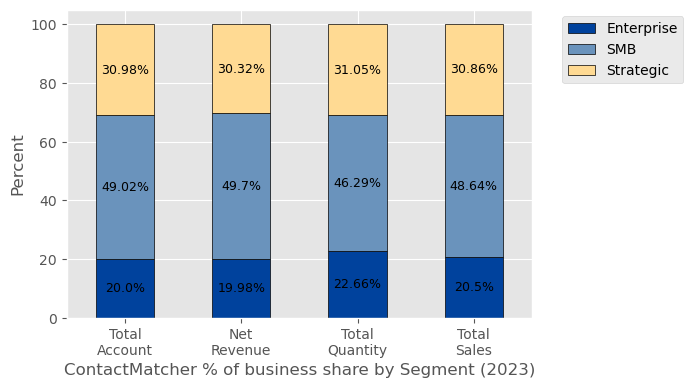

In [127]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod1_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('ContactMatcher % of business share by Segment (2023)')
plt.ylabel('Percent')

-  In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "ContactMatcher" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for ContactMatcher based on the last year of company activity.
- Here it can be observed that the proportion of accounts, quantity, sales, and revenue are mostly proportional for each customer segment. For example, for the Enterprise segment, the amount of accounts, quantity, Sales, and Revenue are all around 20%. This is highly unlikely for real-world datasets, in which the proportions of business share would tend to be disproportional.
- Regardless, we can see that for "ContactMatcher" SMB segment holds the highest share in Total Accounts (49.02%), Net Revenue (49.70%), Total Quantity (46.29%), and Total Sales (48.64%).

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

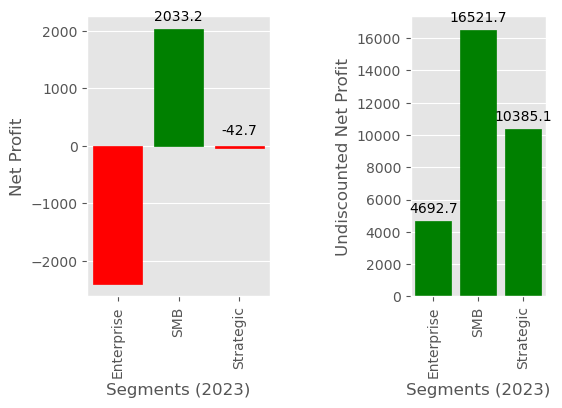

In [130]:
# ContactMatcher net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod1_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments (2023)')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod1_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments (2023)')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- SMB segment leads the ContactMatcher product in Total Accounts (49.02%), Total Quantity (46.29%), Net Revenue (49.70%), and Total Sales (48.64%). It also shows the highest Net Profit Before Discount (16521.6780) and a substantial positive Net Profit (2033.2472), making it the top performer.
- Strategic segment maintains significant shares in Total Accounts (30.98%), Net Revenue (30.32%), Total Quantity (31.05%), and Total Sales (30.86%). However, it demonstrates a negative Net Profit of -42.7000 despite a positive Net Profit Before Discount (10385.1222), indicating challenges in profitability.
- Enterprise segment, while having the lowest shares compared to the other segments, still maintains a consistent presence in Total Accounts (20.00%) and Net Revenue (19.98%). It reports a negative Net Profit of -2394.1468 despite a positive Net Profit Before Discount (4692.7372), highlighting areas for improvement in cost management and profitability.

SMB segment is the key contributor to profitability for the ContactMatcher product, demonstrating strong contributions in both revenue and profitability. The Strategic segment, while showing significant shares in terms of business metrics, faces challenges in achieving profitability. Similarly, the Enterprise segment, despite maintaining a presence, reports a negative net profit, indicating areas for potential cost optimization and performance improvement.

### Further Inquiries on Segments -----------

In [113]:
# Copy-pasted code for Industry queries within segment
# Industries using ContactMatcher within the SMB Segment
prod1_2023_industry_SMB = prod1_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod1_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod1_2023_percents_SMB = SMB_account.merge(prod1_2023_industry_SMB,how='left',on=['Industry'])
prod1_2023_percents_SMB['% Account']= prod1_2023_percents_SMB['account'] / prod1_2023_percents_SMB['account'].sum() *100
prod1_2023_percents_SMB['% Quantity']= prod1_2023_percents_SMB['Quantity'] / prod1_2023_percents_SMB['Quantity'].sum() *100
prod1_2023_percents_SMB['% Sales']= prod1_2023_percents_SMB['Sales'] / prod1_2023_percents_SMB['Sales'].sum() *100
prod1_2023_percents_SMB['% Net Revenue']= prod1_2023_percents_SMB['discounted_sales'] / prod1_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod1_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod1_SMB = percents_SMB.columns.tolist()
# Industries using ContactMatcher within the Strategic Segment
prod1_2023_industry_Strategic = prod1_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod1_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod1_2023_percents_Strategic = Strategic_account.merge(prod1_2023_industry_Strategic,how='left',on=['Industry'])
prod1_2023_percents_Strategic['% Account']= prod1_2023_percents_Strategic['account'] / prod1_2023_percents_Strategic['account'].sum() *100
prod1_2023_percents_Strategic['% Quantity']= prod1_2023_percents_Strategic['Quantity'] / prod1_2023_percents_Strategic['Quantity'].sum() *100
prod1_2023_percents_Strategic['% Sales']= prod1_2023_percents_Strategic['Sales'] / prod1_2023_percents_Strategic['Sales'].sum() *100
prod1_2023_percents_Strategic['% Net Revenue']= prod1_2023_percents_Strategic['discounted_sales'] / prod1_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod1_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod1_Strategic = percents_Strategic.columns.tolist()
# Industries using ContactMatcher within the Enterprise Segment
prod1_2023_industry_Enterprise = prod1_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod1_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod1_2023_percents_Enterprise = Enterprise_account.merge(prod1_2023_industry_Enterprise,how='left',on=['Industry'])
prod1_2023_percents_Enterprise['% Account']= prod1_2023_percents_Enterprise['account'] / prod1_2023_percents_Enterprise['account'].sum() *100
prod1_2023_percents_Enterprise['% Quantity']= prod1_2023_percents_Enterprise['Quantity'] / prod1_2023_percents_Enterprise['Quantity'].sum() *100
prod1_2023_percents_Enterprise['% Sales']= prod1_2023_percents_Enterprise['Sales'] / prod1_2023_percents_Enterprise['Sales'].sum() *100
prod1_2023_percents_Enterprise['% Net Revenue']= prod1_2023_percents_Enterprise['discounted_sales'] / prod1_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod1_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod1_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

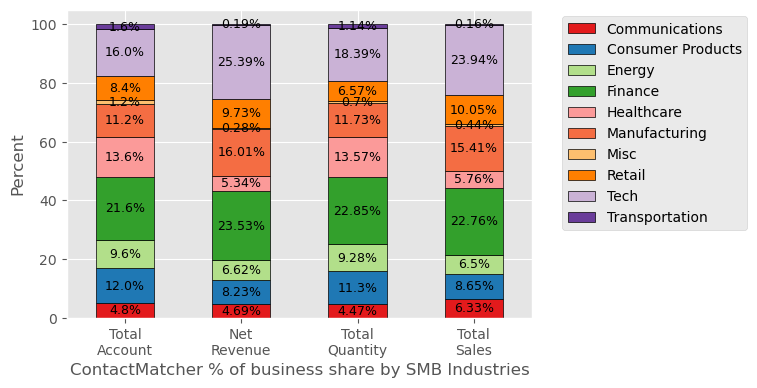

In [132]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod1_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('ContactMatcher % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (21.60%), Net Revenue (23.53%), and Total Quantity (22.85%).
- Tech industry holds the highest share in Net Revenue (25.39%) and Total Sales (23.94%).
- Manufacturing industry shows strong performance with significant shares in Net Revenue (16.01%) and Total Sales (15.41%).
- Consumer Products and Healthcare industries maintain consistent shares across categories, contributing notably to Net Revenue and Total Sales.
- Communications, Energy, and Retail industries show moderate shares across categories.
- Misc and Transportation industries, despite lower shares, maintain a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

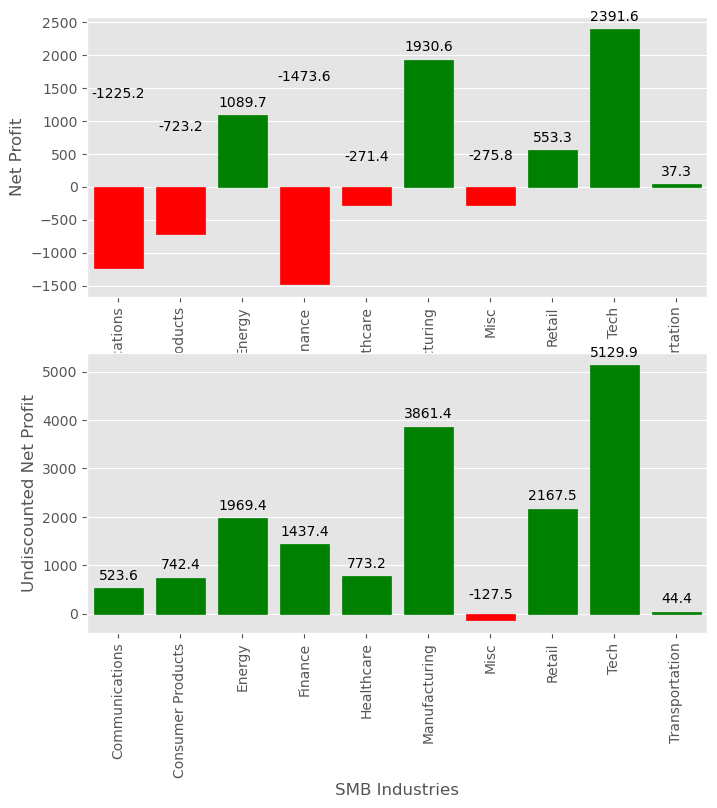

In [46]:
# ContactMatcher net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod1_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod1_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Tech industry leads in Net Revenue (25.39%) and Total Sales (23.94%), showing strong financial performance with a substantial positive Net Profit of 2391.5860.
- Finance industry, despite leading in Total Accounts (21.60%) and Net Revenue (23.53%), reports a negative Net Profit of -1473.6205, indicating challenges in profitability.
- Manufacturing industry shows significant contributions in Net Revenue (16.01%) and Total Sales (15.41%), achieving a substantial positive Net Profit of 1930.5551.
- Energy industry maintains consistent shares across categories, achieving a substantial positive Net Profit of 1089.6911.
- Retail industry, while having moderate shares, achieves a positive Net Profit of 553.3287.
- Consumer Products, Healthcare, and Communications industries, despite having moderate shares, report negative net profits, indicating areas for improvement in cost management and profitability.
- Misc industry, despite lower shares, reports a negative Net Profit of -275.7656.
- Transportation industry, while having the lowest shares, maintains a positive Net Profit of 37.2578.

Tech, Manufacturing, and Energy industries are key contributors to profitability within the SMB segment of the ContactMatcher product, demonstrating strong contributions in both revenue and profitability. The Retail and Transportation industries also show positive financial performance. The Finance, Consumer Products, Healthcare, and Communications industries, despite having significant shares, face challenges in achieving profitability. The Misc industry, while having lower shares, reports negative financial performance, indicating areas for potential improvement.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

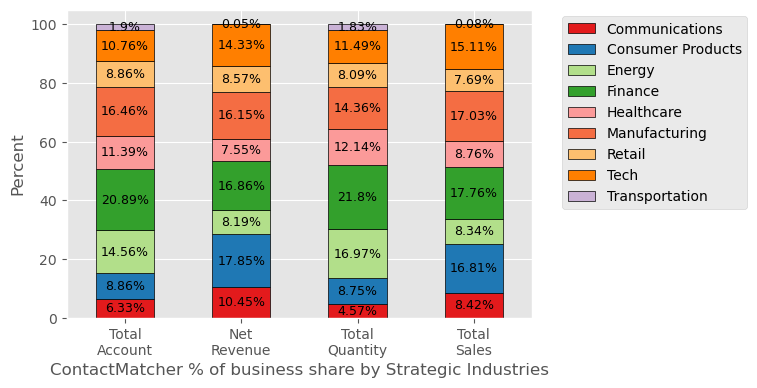

In [47]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod1_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('ContactMatcher % of business share by Strategic Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (20.89%) and Total Quantity (21.80%), showing significant presence in the Strategic segment.
- Consumer Products and Manufacturing industries hold strong positions with notable shares in Net Revenue and Total Sales, contributing significantly to the segment.
- Tech industry maintains a strong presence with significant shares in Net Revenue (14.33%) and Total Sales (15.11%).
- Healthcare, Energy, and Communications industries show moderate shares across categories.
- Retail industry, while having moderate shares, contributes to the segment's overall performance.
- Transportation industry, despite lower shares, maintains a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

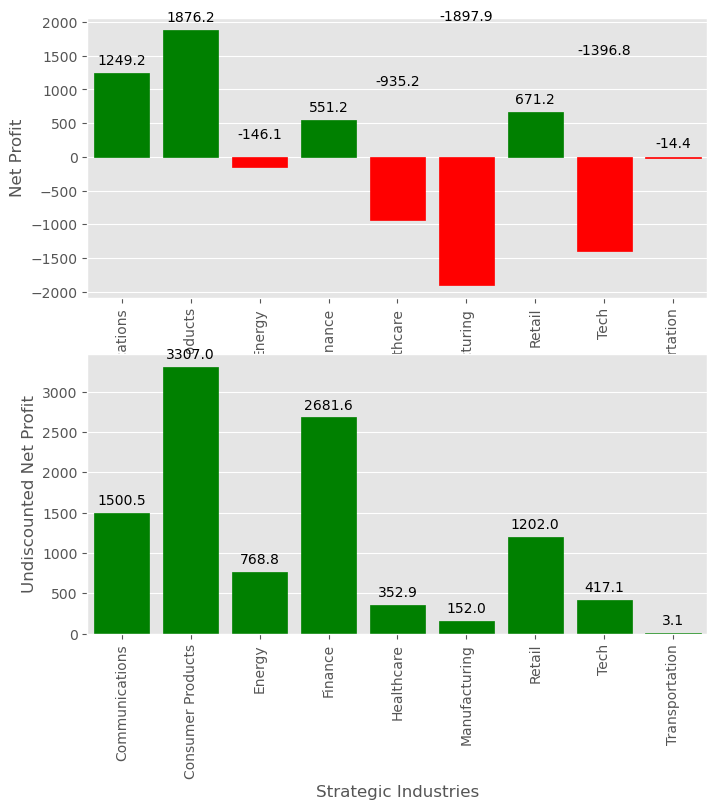

In [48]:
# ContactMatcher net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod1_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod1_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads in Total Accounts (20.89%) and Total Quantity (21.80%), showing significant presence in the Strategic segment. It also achieves a positive Net Profit of 551.1650 despite a high Net Profit Before Discount (2681.5674), indicating effective cost management.
- Consumer Products industry holds the highest share in Net Revenue (17.85%) and Total Sales (16.81%), achieving a substantial positive Net Profit of 1876.1590.
- Manufacturing industry shows strong performance with significant shares in Net Revenue (16.15%) and Total Sales (17.03%), though it reports a negative Net Profit of -1897.9220 despite a positive Net Profit Before Discount (152.0469), indicating areas for cost optimization.
- Tech industry maintains a strong presence with notable shares in Net Revenue (14.33%) and Total Sales (15.11%), but reports a negative Net Profit of -1396.7838.
- Energy and Healthcare industries, despite moderate shares, report negative net profits of -146.1452 and -935.1889, respectively, indicating challenges in profitability.
- Communications and Retail industries maintain consistent shares across categories, achieving positive net profits of 1249.2126 and 671.1637, respectively.
- Transportation industry, despite lower shares, reports a negative Net Profit of -14.3604.

Finance and Consumer Products industries are key contributors to profitability within the Strategic segment of the ContactMatcher product, demonstrating strong contributions in both revenue and profitability. The Communications and Retail industries also show positive financial performance. The Manufacturing, Tech, Energy, and Healthcare industries, despite having significant shares, face challenges in achieving profitability. The Transportation industry, while having lower shares, reports negative financial performance, indicating areas for potential improvement.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

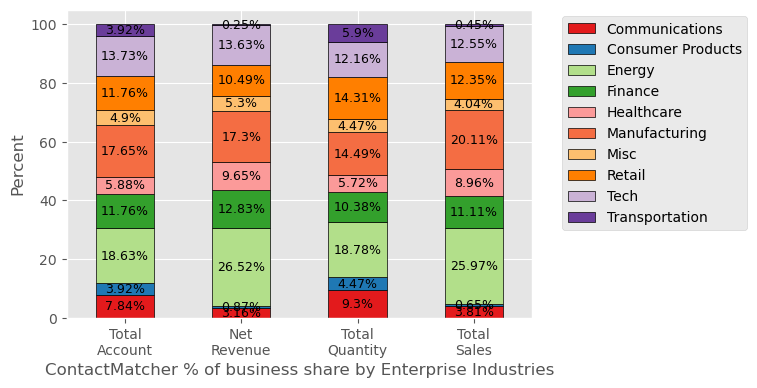

In [49]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod1_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('ContactMatcher % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Energy industry leads in Total Accounts (18.63%), Net Revenue (26.52%), and Total Sales (25.97%).
- Manufacturing industry holds significant shares in Total Accounts (17.65%), Net Revenue (17.30%), and Total Sales (20.11%).
- Tech industry shows strong performance with notable shares in Net Revenue (13.63%) and Total Sales (12.55%).
- Retail industry maintains a consistent presence across categories, contributing notably to Net Revenue and Total Sales.
- Finance and Communications industries show moderate shares across categories.
- Healthcare, Consumer Products, Misc, and Transportation industries, while having lower shares, still contribute to the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

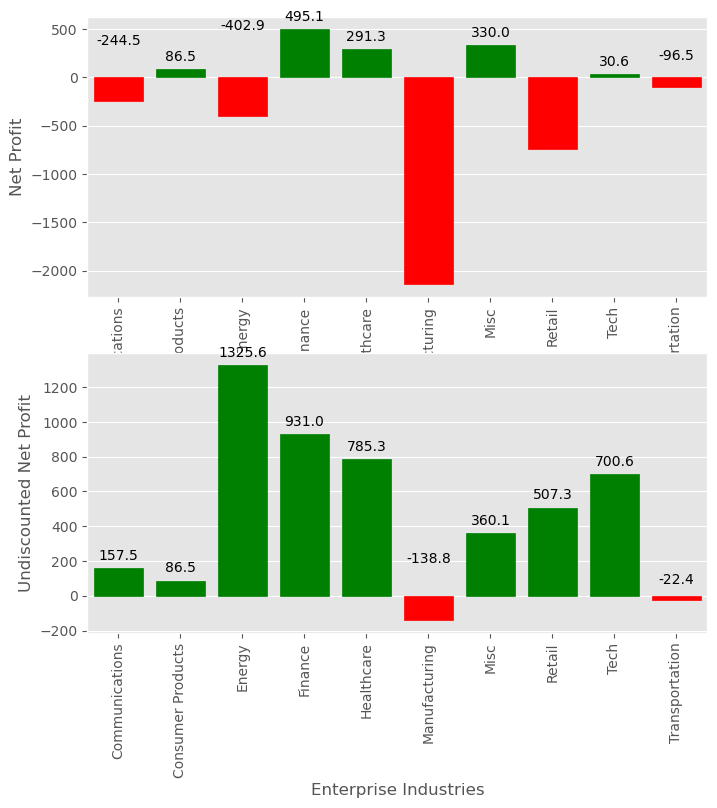

In [50]:
# ContactMatcher net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod1_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod1_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Energy industry leads in Total Accounts (18.63%), Net Revenue (26.52%), and Total Sales (25.97%), but reports a negative Net Profit of -402.9323 despite a positive Net Profit Before Discount (1325.6066), indicating challenges in profitability.
- Manufacturing industry shows significant shares in Total Accounts (17.65%), Net Revenue (17.30%), and Total Sales (20.11%), but reports a negative Net Profit of -2136.7625.
- Tech industry maintains a strong presence with notable shares in Net Revenue (13.63%) and Total Sales (12.55%), achieving a small positive Net Profit of 30.6336.
- Finance industry, while having moderate shares, achieves a positive Net Profit of 495.1450.
- Healthcare industry, despite lower shares, maintains a presence with a positive Net Profit of 291.2755.
- Misc industry, despite lower shares, achieves a positive Net Profit of 329.9888.
- Retail and Communications industries, despite having significant shares, report negative net profits of -747.0242 and -244.4559, respectively.
- Consumer Products industry, while having lower shares, achieves a positive Net Profit of 86.4822.
- Transportation industry, despite lower shares, reports a negative Net Profit of -96.4970.

Finance, Tech, Healthcare, Misc, and Consumer Products industries are key contributors to profitability within the Enterprise segment of the ContactMatcher product, demonstrating positive net profits. The Energy, Manufacturing, Retail, and Communications industries, despite having significant shares, face challenges in achieving profitability. The Transportation industry, while having lower shares, reports negative financial performance, indicating areas for potential improvement.

**Key findings:**
1. SMBs are the top performers, driving 49.70% of net revenue and 48.64% of sales, with a net profit of 2,033.25, even higher at 16,521.68 before discounts. They are financially efficient and impactful. Despite SMBs' lead, the Strategic segment (30.32% net revenue, 30.86% sales) also contributes significantly. Even though the Strategic segment is losing profit (-42.70), abandoning it could mean lost opportunities. The Enterprise segment (19.98% net revenue, 20.50% sales) yields low contribution and low profits (-2,394.15) and should be given less consideration. A balanced strategy focusing on SMBs while improving the Strategic segment is the best approach.

### Regional EDA

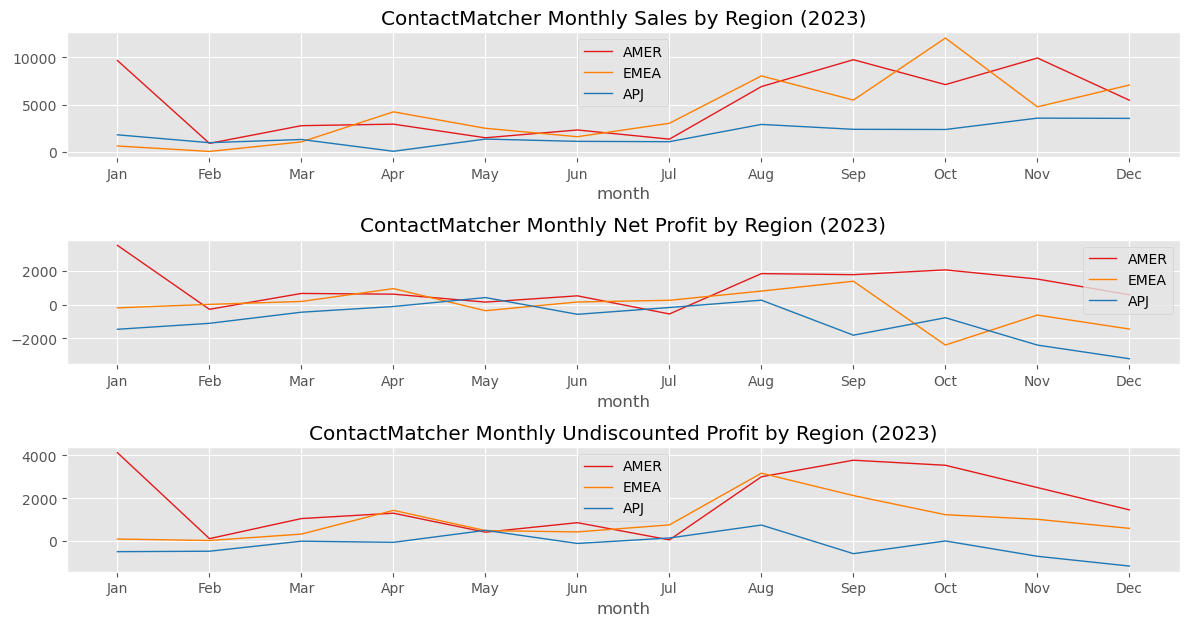

In [7]:
# ContactMatcher Monthly Income EDA by Region (2023)
prod1_region_month = prod1_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod1_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod1_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod1_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('ContactMatcher Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod1_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod1_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod1_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('ContactMatcher Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod1_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod1_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod1_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('ContactMatcher Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

AMER shows high performance in January, September, and October, while EMEA excels in October sales but requires improved cost management.
- AMER consistently demonstrates strong sales and profits, particularly excelling in January, September, and October.
- EMEA demonstrates variable performance. October records high sales but also a significant net loss, indicating potential issues with cost management or discounts.
- APJ faces challenges with net profit, experiencing negative values in many months. However, May and August show some positive performance.

Performance Highlights
- Highest Sales: In EMEA, October shows the highest sales of 12,058.2360.
- Highest Net Profit: The highest net profit is seen in AMER, January, with a net profit of 3518.9987.
- Highest Undiscounted Profit: AMER in January also shows the highest undiscounted profit at 4127.0057.

([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

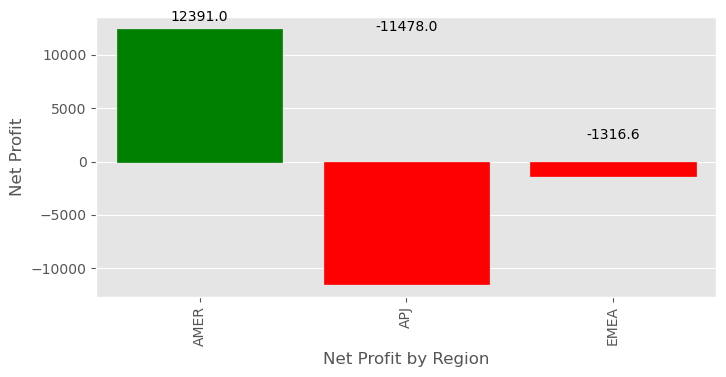

In [ ]:
prod1_region = prod1_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod1_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [10]:
prod1_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,963,60720.7680,50934.9890,22176.7315,12390.9525
1,APJ,564,22563.2660,13327.5706,-2242.2755,-11477.9709
2,EMEA,940,50595.6975,37614.0349,11665.0814,-1316.5812


High-Performing Region
- AMER stands out as the top-performing region with the highest sales, discounted sales, and net profit. It managed to achieve significant positive profits even before discounts.
- Continue leveraging successful strategies. Further analysis into specific high-performing months might reveal valuable insights.

Mixed Performance
- EMEA contributes substantial sales, but ends up with a negative net profit, hinting at underlying inefficiencies or high costs that need addressing.
- Despite good sales figures, focus on reducing costs and improving profit margins.

Challenging Region
- APJ has a negative net profit, indicating challenges with profitability despite reasonable sales. This suggests potential issues with cost management or heavy discounting.
- Investigate high costs or inefficiencies. Consider revising pricing or discount strategies.

In [8]:
grouped = prod1_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [9]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

In [ ]:
#pd.set_option('display.max_rows', None)
#metrics_sorted

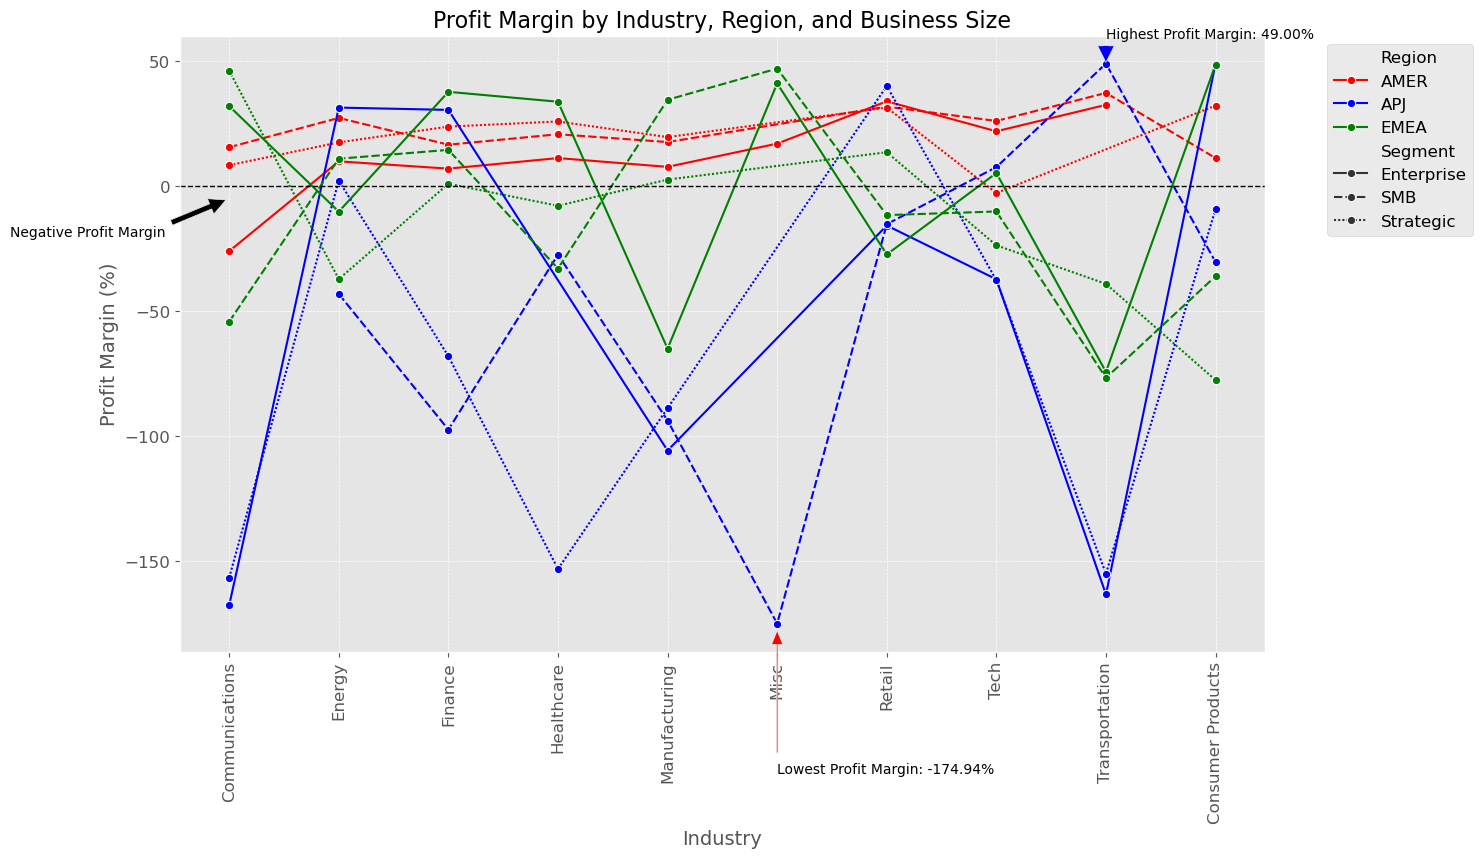

In [50]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Annotate the plot with an arrow pointing outside the chart
plt.annotate(
    'Negative Profit Margin', 
    xy=(0, -5),  # Point of the arrow
    xytext=(-2, -20),  # Position of the text
    arrowprops=dict(facecolor='black', shrink=0.05)
)

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit - 60),  # Move text position to point arrow downwards
    arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=8, headlength=10)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


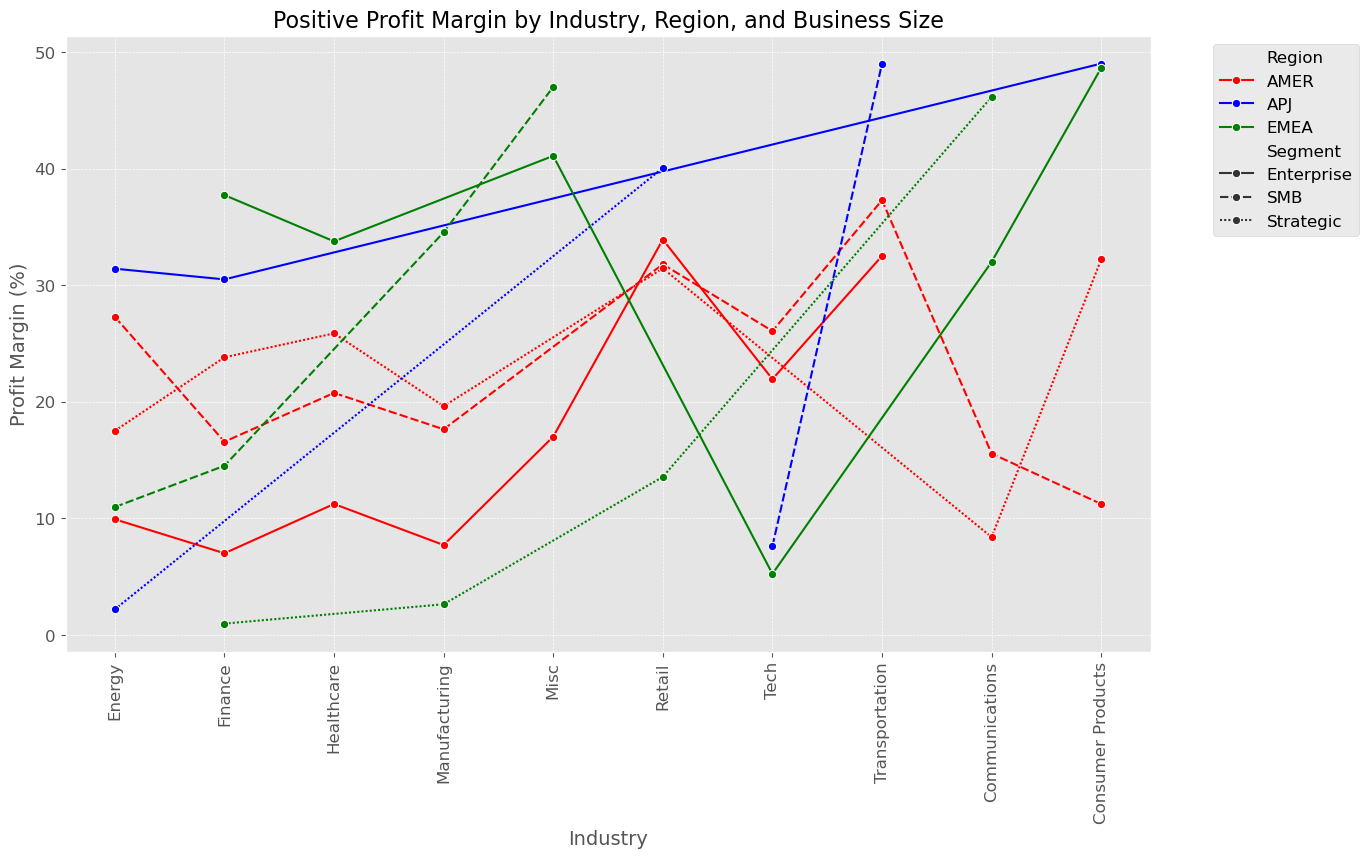

In [109]:
# Filter the data to include only positive profit margins
positive_metrics = metrics_sorted[metrics_sorted['profit_margin'] > 0]

plt.figure(figsize=(14, 8))
sns.lineplot(data=positive_metrics, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Positive Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [10]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])


#### Cross-segment SMB

In [11]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

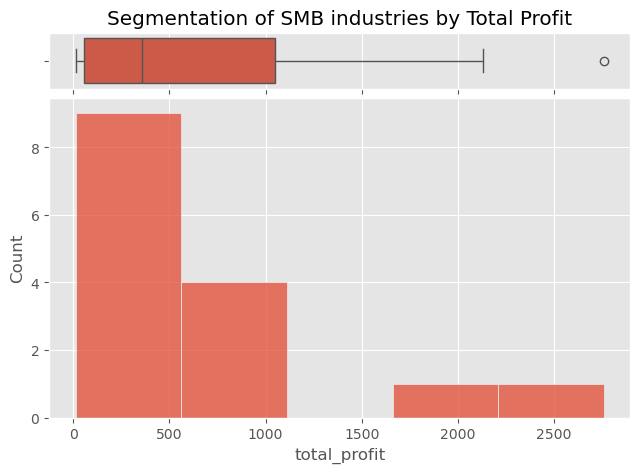

0.0000     12.4164
0.2500     54.0347
0.5000    360.0268
0.7500   1048.1035
1.0000   2759.3426
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 1048.10 in profit
- 3 (Good) : Contributes between 360.03 and 1048.10 in profit
- 2 (Marginal) : Contributes between 54.03 and 360.03 in profit
- 1 (Underperforming) : Contributes less than 54.03 in profit


In [12]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [13]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
16,AMER,SMB,Tech,2759.3426,0.2850,4
67,EMEA,SMB,Manufacturing,2128.0271,0.3875,4
11,AMER,SMB,Energy,1105.5798,0.2833,4
65,EMEA,SMB,Finance,1102.3073,0.3290,4
15,AMER,SMB,Retail,993.8996,0.3222,3
12,AMER,SMB,Finance,647.7955,0.2500,3
14,AMER,SMB,Manufacturing,543.4615,0.3625,3
13,AMER,SMB,Healthcare,360.0268,0.2684,2
10,AMER,SMB,Consumer Products,273.6658,0.2786,2
9,AMER,SMB,Communications,225.3244,0.2667,2


In [14]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Tech in AMER, Manufacturing in EMEA, Energy in AMER, Finance in EMEA are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Retail in AMER, Finance in AMER, Manufacturing in AMER all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Healthcare in AMER, Consumer Products in AMER, Communications in AMER, Tech in APJ, Misc in EMEA, Transportation in AMER, Transportation in APJ, Energy in EMEA are underperforming.
These SMB industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [23]:
###Filter negative profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_negative_profit_metrics = smb_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

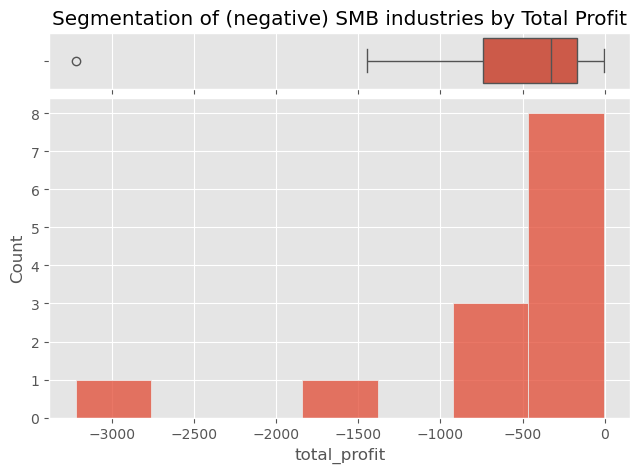

0.0000   -3223.7233
0.2500    -740.9335
0.5000    -324.1427
0.7500    -170.6430
1.0000      -3.7996
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -740.93 in profit
- 3 (Significant) : Loses between -740.93 and -324.14 in profit
- 2 (Negative) : Loses between -324.14 and -170.64 in profit
- 1 (Marginal) : Loses less than -170.64 in profit


In [26]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [27]:
smb_negative_profit_metrics['segmentation score'] = pd.qcut(
    smb_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

smb_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
36,APJ,SMB,Finance,-3223.7233,0.5923,4
62,EMEA,SMB,Communications,-1450.4862,0.4400,4
34,APJ,SMB,Consumer Products,-826.2584,0.4769,4
38,APJ,SMB,Manufacturing,-740.9335,0.7000,4
66,EMEA,SMB,Healthcare,-473.0545,0.3633,3
70,EMEA,SMB,Tech,-427.4490,0.2706,3
39,APJ,SMB,Misc,-324.1427,0.8000,3
69,EMEA,SMB,Retail,-251.8008,0.1444,2
40,APJ,SMB,Retail,-188.7701,0.6333,2
63,EMEA,SMB,Consumer Products,-170.6430,0.4556,2


In [34]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_negative_profit_metrics[smb_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "are SMB industries contributing to substantial losses and are considered high-risk.\nStrategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "all suffer notable losses.\nCareful analysis and targeted strategies are essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")


Finance in APJ, Communications in EMEA, Consumer Products in APJ, Manufacturing in APJ are SMB industries contributing to substantial losses and are considered high-risk.
Strategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Healthcare in EMEA, Tech in EMEA, Misc in APJ all suffer notable losses.
Careful analysis and targeted strategies are essential to stabilize and mitigate further declines.

Retail in EMEA, Retail in APJ, Consumer Products in EMEA, Healthcare in APJ, Energy in APJ, Transportation in EMEA incur moderate losses.
They require attention to prevent slipping into more significant losses.



In [ ]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the SMB segment
total_metrics_SMB = prod1_2023.query("Segment == 'SMB'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with net_profit < 0 filter
prod1_2023_industry_region_SMB = prod1_2023.query("Segment == 'SMB' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
SMB_account = prod1_2023.query("Segment == 'SMB'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod1_2023_percents_SMB = SMB_account.merge(prod1_2023_industry_region_SMB, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod1_2023_percents_SMB = prod1_2023_percents_SMB.dropna()

# Calculate percentages
prod1_2023_percents_SMB['% Account'] = prod1_2023_percents_SMB['account'] / SMB_account['account'].sum() * 100
prod1_2023_percents_SMB['% Quantity'] = prod1_2023_percents_SMB['Quantity'] / total_metrics_SMB['Quantity'] * 100
prod1_2023_percents_SMB['% Sales'] = prod1_2023_percents_SMB['Sales'] / total_metrics_SMB['Sales'] * 100
prod1_2023_percents_SMB['% Net Revenue'] = prod1_2023_percents_SMB['discounted_sales'] / total_metrics_SMB['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Finance', 'Communications', 'Consumer Products', 'Manufacturing']
specific_regions = ['APJ', 'EMEA']
filtered_SMB = prod1_2023_percents_SMB[(prod1_2023_percents_SMB['Industry'].isin(specific_industries)) & 
                                       (prod1_2023_percents_SMB['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_SMB.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

In [77]:
filtered_percentages

% Account  % Quantity  % Sales  % Net Revenue
Industry          Region                                               
Communications    EMEA       2.0000      1.6637   3.9272         2.0692
Consumer Products APJ        4.4000      2.8021   3.8488         3.1614
                  EMEA       3.6000      1.0508   0.4385         0.1692
Finance           APJ        4.4000      4.8161   4.8743         2.3430
                  EMEA      10.8000      4.0280   1.5296         0.7978
Manufacturing     APJ        2.8000      1.9264   1.2138         0.6698
                  EMEA       2.8000      2.1016   0.3455         0.2154

- In the SMB segment, APJ's Finance, Consumer Products, and Manufacturing industries, along with EMEA's Communications industry, contribute to the most severe losses. Despite Finance and Manufacturing holding significant SMB shares (Finance: 21.60% in Total Accounts, 23.53% in Net Revenue; Manufacturing: 15.41% in Total Sales, 16.01% in Net Revenue), those within the 'Severe' loss category contribute minimally. For instance, Finance industries in APJ (with negative profits) constitutes for just 4.4% of Total Accounts, ~5% of Quantity, ~5% of Sales, and around ~2.3% of Net Revenue (post-discount sales). If reducing discounts isn't feasible for these industries, it may be necessary to accept the loss of sales from them.

In [71]:
# to see detailed Discounted orders for the SMB "Severe" Category
filtered_SMB2 = prod1_2023[(prod1_2023['Industry'].isin(specific_industries)) & (prod1_2023['Region'].isin(specific_regions)) & (prod1_2023['net_profit'] < 0) ]
filtered_SMB3 = filtered_SMB2[filtered_SMB2['Segment'] == 'SMB']
grouped_data = filtered_SMB3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [76]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Communications,EMEA,0.4000,1
1,Communications,EMEA,0.7000,2
2,Consumer Products,APJ,0.3000,3
3,Consumer Products,APJ,0.5000,1
4,Consumer Products,APJ,0.8000,6
5,Consumer Products,EMEA,0.7000,5
6,Finance,APJ,0.3000,1
7,Finance,APJ,0.5000,2
8,Finance,APJ,0.8000,8
9,Finance,EMEA,0.4000,1


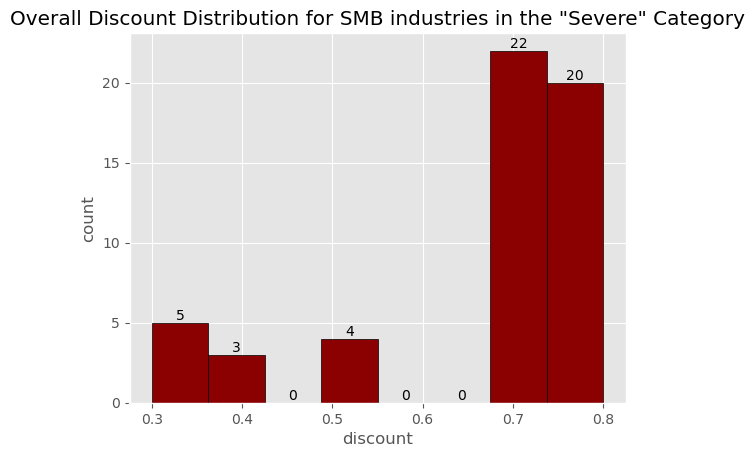

In [82]:
n, bins, patches = plt.hist(data=filtered_SMB3, x='Discount', bins=8, color='#8B0000', edgecolor='black')
plt.title('Overall Discount Distribution for SMB industries in the "Severe" Category')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

- From the chart above, we can see most SMB industries with severe losses receive discounts in the 70-80% range. High-value purchases, like Finance in APJ losing over -3223.7233, highlight discounting as a major issue. 
- Primarily, it is important to rethink discount strategies for Finance in APJ, Communications in EMEA, Consumer Products in APJ, and Manufacturing in APJ. Balance revenue and profitability with smart, efficient measures. Measure operational costs alongside marketing and discounting efforts to ensure overall profitability.
- Though less severe, many other industries in the SMB segment suffer losses, namely Healthcare in EMEA, Tech in EMEA, Misc in APJ, Retail in EMEA, Retail in APJ, Consumer Products in EMEA, Healthcare in APJ, Energy in APJ, and Transportation in EMEA. These all require attention to prevent slipping into more significant losses.

#### Cross-segment Strategic

In [83]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

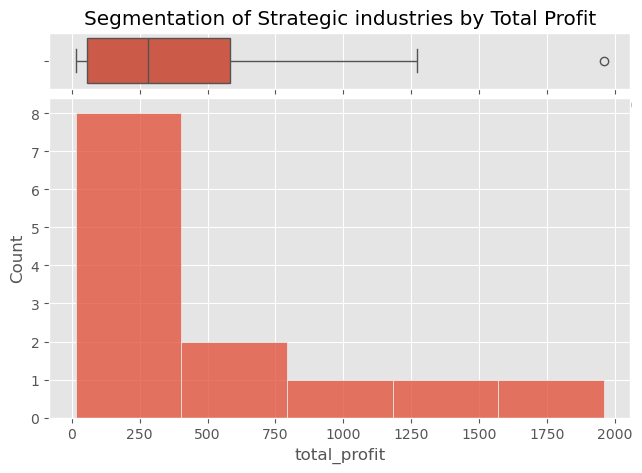

0.0000     13.6421
0.2500     56.4634
0.5000    281.5545
0.7500    583.0469
1.0000   1960.4498
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 583.05 in profit
- 3 (Good) : Contributes between 281.55 and 583.05 in profit
- 2 (Marginal) : Contributes between 56.46 and 281.55 in profit
- 1 (Underperforming) : Contributes less than 56.46 in profit


In [84]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [60]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,segmentation score
19,AMER,Strategic,Consumer Products,1960.4498,4
72,EMEA,Strategic,Communications,1271.4692,4
21,AMER,Strategic,Finance,1029.4093,4
23,AMER,Strategic,Manufacturing,583.0469,3
22,AMER,Strategic,Healthcare,471.1453,3
20,AMER,Strategic,Energy,284.3673,3
78,EMEA,Strategic,Retail,281.5545,2
49,APJ,Strategic,Retail,204.1218,2
24,AMER,Strategic,Retail,185.4874,2
18,AMER,Strategic,Communications,56.4634,1


In [ ]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Consumer Products in AMER, Communications in EMEA, Finance in AMER are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Manufacturing in AMER, Healthcare in AMER, Energy in AMER all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Retail in EMEA, Retail in APJ, Retail in AMER, Communications in AMER, Manufacturing in EMEA, Finance in EMEA, Energy in APJ are underperforming.
These Strategic industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [85]:
###Filter negative profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Strategic segment
strategic_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_negative_profit_metrics = strategic_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

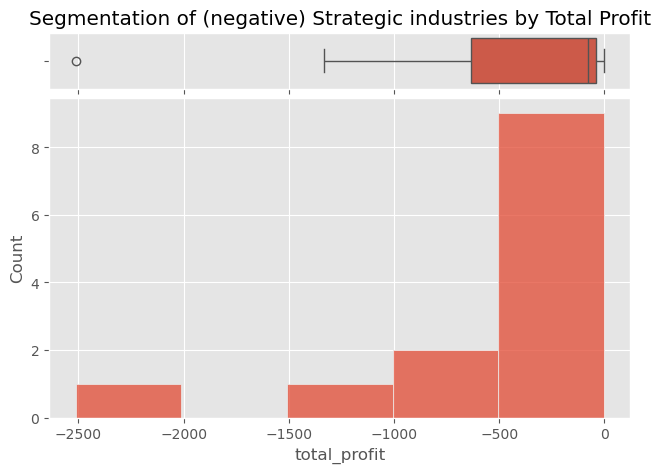

0.0000   -2513.2928
0.2500    -633.0653
0.5000     -78.7200
0.7500     -41.5108
1.0000      -1.9344
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -633.07 in profit
- 3 (Significant) : Loses between -633.07 and -78.72 in profit
- 2 (Negative) : Loses between -78.72 and -41.51 in profit
- 1 (Marginal) : Loses less than -41.51 in profit


In [86]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [87]:
strategic_negative_profit_metrics['segmentation score'] = pd.qcut(
    strategic_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

strategic_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
48,APJ,Strategic,Manufacturing,-2513.2928,0.4000,4
47,APJ,Strategic,Healthcare,-1333.4004,0.8000,4
79,EMEA,Strategic,Tech,-722.2077,0.3714,4
50,APJ,Strategic,Tech,-633.0653,0.6750,4
46,APJ,Strategic,Finance,-500.1246,0.6800,3
74,EMEA,Strategic,Energy,-444.1546,0.3250,3
43,APJ,Strategic,Communications,-78.7200,0.8000,3
44,APJ,Strategic,Consumer Products,-77.5370,0.5571,2
76,EMEA,Strategic,Healthcare,-72.9338,0.4222,2
25,AMER,Strategic,Tech,-41.5108,0.2429,2


In [89]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_negative_profit_metrics[strategic_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "are Strategic industries contributing to substantial losses and are considered high-risk.\nKey improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "all suffer notable losses.\nCareful analysis and targeted strategies are essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")

Manufacturing in APJ, Healthcare in APJ, Tech in EMEA, Tech in APJ are Strategic industries contributing to substantial losses and are considered high-risk.
Key improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Finance in APJ, Energy in EMEA, Communications in APJ all suffer notable losses.
Careful analysis and targeted strategies are essential to stabilize and mitigate further declines.

Consumer Products in APJ, Healthcare in EMEA, Tech in AMER, Transportation in EMEA, Consumer Products in EMEA, Transportation in APJ incur moderate losses.
They require attention to prevent slipping into more significant losses.



In [ ]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the Strategic segment
total_metrics_Strategic = prod1_2023.query("Segment == 'Strategic'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with net_profit < 0 filter <------------change to see total share 
prod1_2023_industry_region_Strategic = prod1_2023.query("Segment == 'Strategic' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
Strategic_account = prod1_2023.query("Segment == 'Strategic'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod1_2023_percents_Strategic = Strategic_account.merge(prod1_2023_industry_region_Strategic, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod1_2023_percents_Strategic = prod1_2023_percents_Strategic.dropna()

# Calculate percentages
prod1_2023_percents_Strategic['% Account'] = prod1_2023_percents_Strategic['account'] / Strategic_account['account'].sum() * 100
prod1_2023_percents_Strategic['% Quantity'] = prod1_2023_percents_Strategic['Quantity'] / total_metrics_Strategic['Quantity'] * 100
prod1_2023_percents_Strategic['% Sales'] = prod1_2023_percents_Strategic['Sales'] / total_metrics_Strategic['Sales'] * 100
prod1_2023_percents_Strategic['% Net Revenue'] = prod1_2023_percents_Strategic['discounted_sales'] / total_metrics_Strategic['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Manufacturing', 'Healthcare', 'Tech']
specific_regions = ['APJ', 'EMEA']
filtered_Strategic = prod1_2023_percents_Strategic[(prod1_2023_percents_Strategic['Industry'].isin(specific_industries)) & 
                                       (prod1_2023_percents_Strategic['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_Strategic.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

In [97]:
# Total Share (includes industries with positive net profit)
filtered_percentages

% Account  % Quantity  % Sales  % Net Revenue
Industry      Region                                               
Healthcare    APJ        1.8987      3.1332   2.1081         0.5640
              EMEA       5.6962      5.0914   2.2434         2.0823
Manufacturing APJ        3.7975      3.2637   6.8520         4.2600
              EMEA       6.9620      6.3969   2.9865         3.4213
Tech          APJ        2.5316      2.6110   4.0689         3.4982
              EMEA       3.7975      4.9608   7.3832         6.9165

In [93]:
# Only industries with negative profit
filtered_percentages

% Account  % Quantity  % Sales  % Net Revenue
Industry      Region                                               
Healthcare    APJ        1.8987      3.1332   2.1081         0.5640
              EMEA       5.6962      2.4804   1.3470         1.0493
Manufacturing APJ        3.7975      1.9582   4.5841         1.2264
              EMEA       6.9620      4.4386   0.5847         0.2346
Tech          APJ        2.5316      2.6110   4.0689         3.4982
              EMEA       3.7975      2.4804   5.2777         4.1867

- In the Strategic segment, APJ's Manufacturing, Healthcare, and Tech industries, along with EMEA's Tech industry, contribute to the most severe losses. Despite Manufacturing holding significant Strategic shares (17.03% in Total Sales and 16.15% in Net Revenue), those within the 'Severe' loss category contribute minimally. For instance, Manufacturing industries in APJ (with negative profits) constitutes for just 3.8% of Total Accounts, ~2% of Quantity, 4.6% of Sales, and around 1.23% of Net Revenue (post-discount sales). If reducing discounts isn't feasible for these industries, it may be necessary to accept the loss of sales from them.

In [98]:
# to see detailed Discounted orders for the Strategic "Severe" Category
filtered_Strategic2 = prod1_2023[(prod1_2023['Industry'].isin(specific_industries)) & (prod1_2023['Region'].isin(specific_regions)) & (prod1_2023['net_profit'] < 0) ]
filtered_Strategic3 = filtered_Strategic2[filtered_Strategic2['Segment'] == 'Strategic']
grouped_data = filtered_Strategic3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [99]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Healthcare,APJ,0.8000,4
1,Healthcare,EMEA,0.4000,1
2,Healthcare,EMEA,0.7000,4
3,Manufacturing,APJ,0.8000,3
4,Manufacturing,EMEA,0.7000,8
5,Tech,APJ,0.3000,1
6,Tech,APJ,0.8000,3
7,Tech,EMEA,0.4000,2
8,Tech,EMEA,0.7000,2


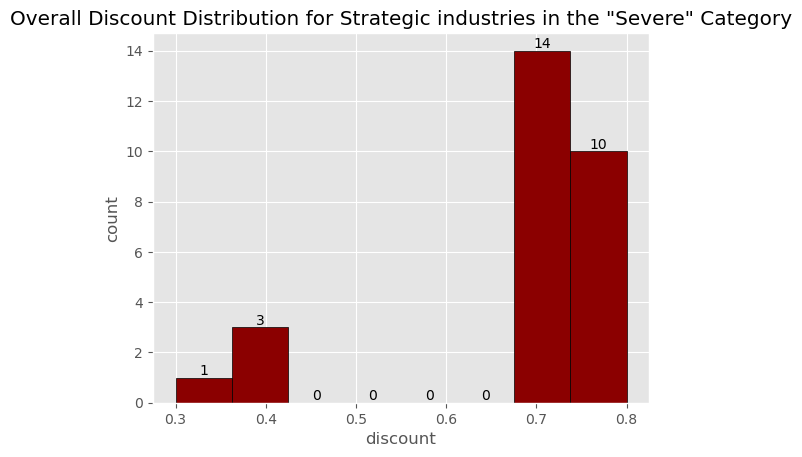

In [101]:
n, bins, patches = plt.hist(data=filtered_Strategic3, x='Discount', bins=8, color='#8B0000', edgecolor='black')
plt.title('Overall Discount Distribution for Strategic industries in the "Severe" Category')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

- From the chart above, we can see most Strategic industries with severe losses receive discounts in the 70-80% range. High-value purchases, like Manufacturing in APJ losing -2513.2928, highlight discounting as a major issue. 
- Primarily, it is important to rethink discount strategies for Manufacturing in APJ, Healthcare in APJ, Tech in EMEA, Tech in APJ. Balance revenue and profitability with smart, efficient measures. Measure operational costs alongside marketing and discounting efforts to ensure overall profitability.
- Though less severe, many other industries in the Strategic segment suffer losses, namely Finance in APJ, Energy in EMEA, Communications in APJ, Consumer Products in APJ, Healthcare in EMEA, Tech in AMER, Transportation in EMEA, Consumer Products in EMEA, and Transportation in APJ. These all require attention to prevent slipping into more significant losses.

#### Cross-segment Enterprise

In [ ]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

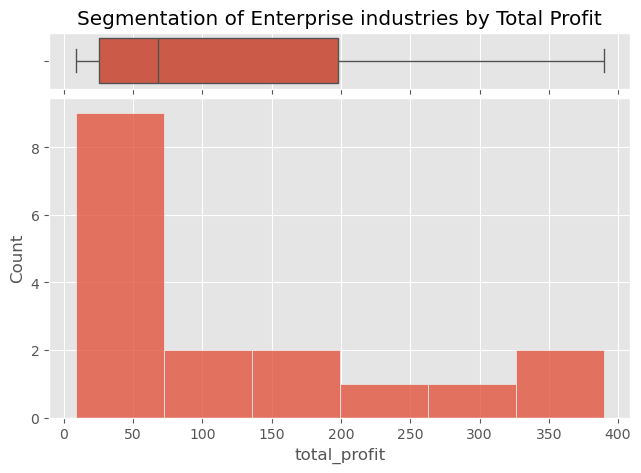

0.0000     8.5548
0.2500    25.2204
0.5000    68.0288
0.7500   198.0998
1.0000   389.8052
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 198.10 in profit
- 3 (Good) : Contributes between 68.03 and 198.10 in profit
- 2 (Marginal) : Contributes between 25.22 and 68.03 in profit
- 1 (Underperforming) : Contributes less than 25.22 in profit


In [65]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [66]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,segmentation score
7,AMER,Enterprise,Tech,389.8052,4
29,APJ,Enterprise,Finance,356.8368,4
3,AMER,Enterprise,Healthcare,268.1662,4
58,EMEA,Enterprise,Misc,241.2556,4
4,AMER,Enterprise,Manufacturing,198.0998,3
28,APJ,Enterprise,Energy,182.3094,3
2,AMER,Enterprise,Finance,129.7534,3
5,AMER,Enterprise,Misc,88.7332,3
53,EMEA,Enterprise,Consumer Products,68.0288,2
6,AMER,Enterprise,Retail,49.6278,2


In [67]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Tech in AMER, Finance in APJ, Healthcare in AMER, Misc in EMEA are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Manufacturing in AMER, Energy in APJ, Finance in AMER, Misc in AMER all maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Consumer Products in EMEA, Retail in AMER, Energy in AMER, Tech in EMEA, Communications in EMEA, Healthcare in EMEA, Consumer Products in APJ, Transportation in AMER, Finance in EMEA are underperforming.
These Enterprise industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rath

In [102]:
###Filter negative profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_negative_profit_metrics = enterprise_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

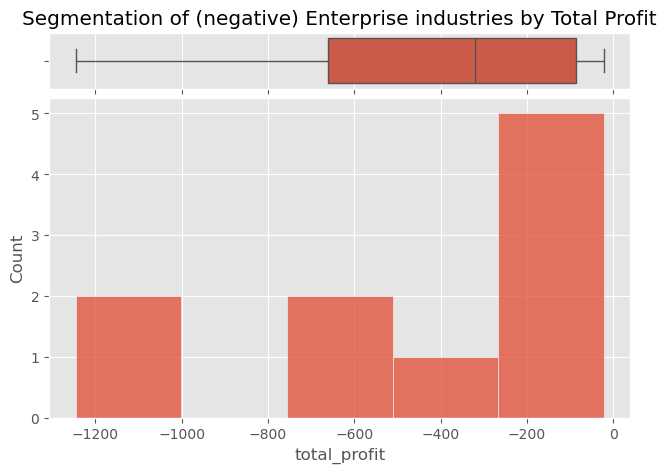

0.0000   -1245.7681
0.2500    -662.2387
0.5000    -319.5665
0.7500     -87.6920
1.0000     -21.9344
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -662.24 in profit
- 3 (Significant) : Loses between -662.24 and -319.57 in profit
- 2 (Negative) : Loses between -319.57 and -87.69 in profit
- 1 (Marginal) : Loses less than -87.69 in profit


In [103]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [104]:
enterprise_negative_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

enterprise_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
57,EMEA,Enterprise,Manufacturing,-1245.7681,0.3000,4
30,APJ,Enterprise,Manufacturing,-1089.0942,0.5333,4
59,EMEA,Enterprise,Retail,-674.3693,0.4111,4
54,EMEA,Enterprise,Energy,-625.8467,0.3611,3
32,APJ,Enterprise,Tech,-391.3910,0.5333,3
0,AMER,Enterprise,Communications,-247.7419,0.3200,2
31,APJ,Enterprise,Retail,-122.2827,0.5500,2
33,APJ,Enterprise,Transportation,-76.1618,0.8000,1
61,EMEA,Enterprise,Transportation,-31.6322,0.7000,1
26,APJ,Enterprise,Communications,-21.9344,0.8000,1


In [105]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_negative_profit_metrics[enterprise_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "are Enterprise industries contributing to substantial losses and are considered high-risk.\nKey improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "all suffer notable losses.\nCareful analysis and targeted strategies are essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")

Manufacturing in EMEA, Manufacturing in APJ, Retail in EMEA are Enterprise industries contributing to substantial losses and are considered high-risk.
Key improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Energy in EMEA, Tech in APJ all suffer notable losses.
Careful analysis and targeted strategies are essential to stabilize and mitigate further declines.

Communications in AMER, Retail in APJ, Transportation in APJ, Transportation in EMEA, Communications in APJ incur moderate losses.
They require attention to prevent slipping into more significant losses.



In [ ]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the Enterprise segment
total_metrics_Enterprise = prod1_2023.query("Segment == 'Enterprise'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with net_profit < 0 filter <------------change to compare with total share 
prod1_2023_industry_region_Enterprise = prod1_2023.query("Segment == 'Enterprise' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
Enterprise_account = prod1_2023.query("Segment == 'Enterprise'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod1_2023_percents_Enterprise = Enterprise_account.merge(prod1_2023_industry_region_Enterprise, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod1_2023_percents_Enterprise = prod1_2023_percents_Enterprise.dropna()

# Calculate percentages
prod1_2023_percents_Enterprise['% Account'] = prod1_2023_percents_Enterprise['account'] / Enterprise_account['account'].sum() * 100
prod1_2023_percents_Enterprise['% Quantity'] = prod1_2023_percents_Enterprise['Quantity'] / total_metrics_Enterprise['Quantity'] * 100
prod1_2023_percents_Enterprise['% Sales'] = prod1_2023_percents_Enterprise['Sales'] / total_metrics_Enterprise['Sales'] * 100
prod1_2023_percents_Enterprise['% Net Revenue'] = prod1_2023_percents_Enterprise['discounted_sales'] / total_metrics_Enterprise['discounted_sales'] * 100

# Filter data for specific industries and regions 
specific_industries = ['Manufacturing', 'Retail']
specific_regions = ['APJ', 'EMEA']
filtered_Enterprise = prod1_2023_percents_Enterprise[(prod1_2023_percents_Enterprise['Industry'].isin(specific_industries)) & 
                                       (prod1_2023_percents_Enterprise['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_Enterprise.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

In [119]:
# all Enterprise industries percentage (all profits, positive and negative); if you all numbers vertically it will sum to 100
prod1_2023_percents_Enterprise.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

% Account  % Quantity  % Sales  % Net Revenue
Industry          Region                                               
Communications    AMER       2.9412      5.0089   3.4706         2.8130
                  APJ        0.9804      2.1467   0.0477         0.0129
                  EMEA       3.9216      2.1467   0.2873         0.3301
Consumer Products APJ        0.9804      1.2522   0.1372         0.1850
                  EMEA       2.9412      3.2200   0.5097         0.6871
Energy            AMER       4.9020      2.5045   1.4932         1.5911
                  APJ        3.9216      4.2934   2.1150         2.7609
                  EMEA       9.8039     11.9857  22.3654        22.1726
Finance           AMER       5.8824      6.7979   6.7605         7.3741
                  APJ        3.9216      2.6834   4.2647         5.3617
                  EMEA       1.9608      0.8945   0.0826         0.0977
Healthcare        AMER       4.9020      5.1878   8.7067         9.3779
                  EMEA       0.9804      0.5367   0.2495         0.2691
Manufacturing     AMER       7.8431      8.2290   9.3730        11.6653
                  APJ        2.9412      1.4311   3.7527         2.0418
                  EMEA       6.8627      4.8301   6.9853         3.5909
Misc              AMER       0.9804      0.3578   1.9018         2.5639
                  EMEA       3.9216      4.1145   2.1396         2.7365
Retail            AMER       0.9804      2.6834   0.5333         0.5751
                  APJ        2.9412      3.2200   2.8285         2.6184
                  EMEA       7.8431      8.4079   8.9930         7.3009
Tech              AMER       6.8627      7.3345   6.4764         7.9139
                  APJ        2.9412      2.1467   3.8292         3.0345
                  EMEA       3.9216      2.6834   2.2452         2.6805
Transportation    AMER       0.9804      0.8945   0.1267         0.1366
                  APJ        1.9608      2.6834   0.1700         0.0458
                  EMEA       0.9804      2.3256   0.1552         0.0628

In [111]:
# Total Share (includes industries with positive net profit)
filtered_percentages

% Account  % Quantity  % Sales  % Net Revenue
Industry      Region                                               
Manufacturing APJ        2.9412      1.4311   3.7527         2.0418
              EMEA       6.8627      4.8301   6.9853         3.5909
Retail        APJ        2.9412      3.2200   2.8285         2.6184
              EMEA       7.8431      8.4079   8.9930         7.3009

In [109]:
# Only industries with negative profit
filtered_percentages

% Account  % Quantity  % Sales  % Net Revenue
Industry      Region                                               
Manufacturing APJ        2.9412      1.2522   2.7977         0.7543
              EMEA       6.8627      2.1467   6.1739         2.4969
Retail        APJ        2.9412      3.2200   2.8285         2.6184
              EMEA       7.8431      4.8301   8.2476         6.4970

- In the Enterprise segment, both Manufacturing in EMEA and APJ, along with Retail in EMEA, contribute to the most significant losses. However, it is important to note that these sectors hold a substantial share of the Enterprise segment.

Manufacturing alone accounts for 17.65% of Total Accounts, 20.11% of Total Sales, and 17.30% of Net Revenue in the Enterprise segment. Particularly, Manufacturing in EMEA and APJ represents approximately half of these figures, with 9.80% in Total Accounts and 10.74% in Total Sales. Despite the notable losses, their significant contribution to the Enterprise shares cannot be overlooked.

In [120]:
# to see detailed Discounted orders for the Enterprise "Severe" Category
filtered_Enterprise2 = prod1_2023[(prod1_2023['Industry'].isin(specific_industries)) & (prod1_2023['Region'].isin(specific_regions)) & (prod1_2023['net_profit'] < 0) ]
filtered_Enterprise3 = filtered_Enterprise2[filtered_Enterprise2['Segment'] == 'Enterprise']
grouped_data = filtered_Enterprise3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [121]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Manufacturing,APJ,0.8000,2
1,Manufacturing,EMEA,0.7000,3
2,Retail,APJ,0.3000,2
3,Retail,APJ,0.8000,2
4,Retail,EMEA,0.4000,2
5,Retail,EMEA,0.7000,3


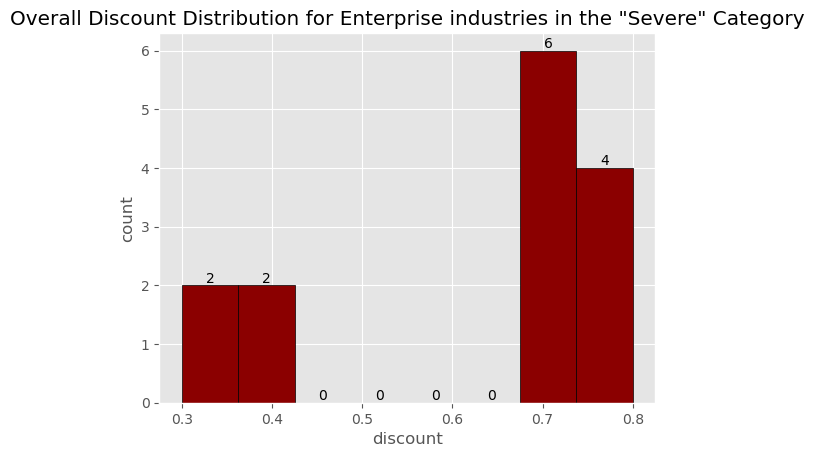

In [123]:
n, bins, patches = plt.hist(data=filtered_Enterprise3, x='Discount', bins=8, color='#8B0000', edgecolor='black')
plt.title('Overall Discount Distribution for Enterprise industries in the "Severe" Category')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

- From the chart above, we can see most Enterprise industries with severe losses receive discounts in the 70-80% range. High-value purchases, like Manufacturing in EMEA losing -1245.7681, highlight discounting as a major issue. 
- Primarily, it is important to rethink discount strategies for Manufacturing in EMEA, Manufacturing in APJ, Retail in EMEA. Balance revenue and profitability with smart, efficient measures. Measure operational costs alongside marketing and discounting efforts to ensure overall profitability.
- Though less severe, many other industries in the Enterprise segment suffer losses, namely Energy in EMEA, Tech in APJ, Communications in AMER, Retail in APJ, Transportation in APJ, Transportation in EMEA, and Communications in APJ. These all require attention to prevent slipping into more significant losses.

**Key findings:**
1. AMER consistently shows high performance in January, September, and October with strong sales and profits. It is the top-performing region with the highest sales, discounted sales, and net profit.
2. EMEA records the highest sales in October but also has significant net losses, highlighting the need for improved cost management. While it contributes substantial sales, reducing costs and improving profit margins is crucial.
3. APJ struggles with profitability, showing negative net profits in many months. Despite reasonable sales, issues with cost management or heavy discounting need to be addressed.
4. In the SMB segment, Tech and Energy in AMER, and Manufacturing and Finance in EMEA perform best and need marketing focus. Finance in APJ, Communications in EMEA, Consumer Products in APJ, and Manufacturing in APJ lose money and are high-risk. Significant shares but minimal contribution from these industries suggest revising discount strategies. Balancing revenue and profitability requires smart measures and considering operational costs and marketing efforts.
5. In the Strategic segment, Consumer Products and Finance in AMER, and Communications in EMEA excel. However, Manufacturing, Healthcare, and Tech in APJ, and Tech in EMEA suffer severe losses. Despite Manufacturing's significant share, its contribution is minimal due to heavy discounting. Rethinking discount strategies is crucial for balancing revenue and profitability.
6. In the Enterprise segment, focus on Tech and Healthcare in AMER, Finance in APJ, and Miscellaneous in EMEA for strategic growth. Address significant losses in Manufacturing and Retail in EMEA and APJ. Heavy discounting is the problem. Revise discount strategies to balance revenue and profitability effectively. Measure all costs to ensure overall profitability.